# Characterization and stability of a fermionic $\nu=1/3$ fractional Chern insulator

This notebook reproduces the tensor network results from the paper: ["Characterization and stability of a fermionic $\nu=1/3$ fractional Chern insulator" by Adolfo G. Grushin, Johannes Motruk, Michael P. Zaletel, Frank Pollmann, Physical Review B 91, 035136 (2015)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.91.035136), freely available at [arXiv:1407.6985 [cond-mat.str-el]](https://arxiv.org/abs/1407.6985).

The paper is about demonstrating the fermionic Laughlin state in the Haldane model using the infinite density matrix renormalization group, first identified by [Neupert et al.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.106.236804) using exact diagonalization several years earlier. It highlights the advantages of the infinite density matrix renormalization group approach and is a good place to start when analyzing fractional Chern insulators using tensor networks. 

We consider fermions hopping on a honeycomb lattice, as depicted in Fig. 1.(b). The Hamiltonian of the system is the celebrated Haldane model plus an interaction term:

$$ H = -\sum_{i,j} t_{i,j} c_i^\dagger c_j + \sum_i m (n_{A,i}-n_{B,i}) + V_1 \sum_{\langle ij\rangle}n_{A,i}n_{B,j},$$

where $t_{i,j}$ is the hopping amplitude, $c_i^\dagger,c_i$ are creation/annihilation operators on site $i$, $m$ is the chemical potential, $n_{A,i}=c_i^\dagger c_i$ is the density operator on site $i$ in sublattice $A$, and $V_1$ is the interaction strength for the nearest-neighbor density-density interaction. The Haldane model is special since the hopping amplitudes are defined with a complex phase that breaks the time-reversal symmetry and plays the role of a magnetic field. Specifically, $t_{\langle ij \rangle}=t_1\in\mathbb{R}$ and $t_{\langle\langle ij\rangle\rangle} = t_2 e^{\pm i \phi}\in \mathbb{C}$, where the $\pm\phi$ phase is acquired by electrons hopping in the same sublattice with the sign given by the direction of the arrows in Fig. 1.(b). 

## Figure 2.(a,b)

The first tensor network results in the paper are concerned with demonstrating the integer quantum Hall effect. In other words, when we completly fill a Chern band, then we should expect a quantized transverse conductivity of the form:

$$ \sigma_\text{H} = \frac{e^2}{h} C $$

This was the result originally demonstrated by [Haldane](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.61.2015). In this figure, we demonstrate this result through the use of charge pumping. We first map our system onto an infinite cylinder, as shown in Fig. 1.(a). We then insert a flux adiabatically through the center of the cylinder and measure the expected charge on the left semi-infinite half. The flux is inserted via twisted boundary conditions as described in the text.

We start by the defining our model, using the parameters from the text: the hopping amplitudes are $t_1=1$ and $\cos\phi=t_1/4t_2 = 3\sqrt{3/43}$, the chemical potential $m=0$, and the interaction strength $V_1=0$, since we are considering the integer quantum Hall effect. The system size is $L_x\times L_y= 1\times 6$ unit cells. The total particle number is conserved.

In [4]:
from tenpy.models.haldane import FermionicHaldaneModel

In [5]:
model_params = dict(conserve='N', Lx=1, Ly=3, t1=-1., bc_MPS='infinite', bc_y='cylinder')
M = FermionicHaldaneModel(model_params)

Reading 'bc_MPS'='infinite' for config FermionicHaldaneModel
Reading 'conserve'='N' for config FermionicHaldaneModel
Reading 'Lx'=1 for config FermionicHaldaneModel
Reading 'Ly'=3 for config FermionicHaldaneModel
Reading 'bc_y'='cylinder' for config FermionicHaldaneModel
Reading 't1'=-1.0 for config FermionicHaldaneModel


It is good practise to now plot the model and verify that the hoppings are correct.

[([('C JW', 0), ('Cd', 1)], (0.25+0.19245008972987523j)),
 ([('C JW', 0), ('Cd', 2)], (0.25000000000000006-0.19245008972987518j)),
 ([('C JW', 0), ('Cd', 6)], (0.25-0.19245008972987523j)),
 ([('C JW', 0), ('Cd', 8)], (0.24999999999999994+0.1924500897298753j)),
 ([('Cd JW', 0), ('C', 1)], (-0.25+0.19245008972987523j)),
 ([('Cd JW', 0), ('C', 2)], (-0.25000000000000006-0.19245008972987518j)),
 ([('Cd JW', 0), ('C', 6)], (-0.25-0.19245008972987523j)),
 ([('Cd JW', 0), ('C', 8)], (-0.24999999999999994+0.1924500897298753j)),
 ([('C JW', 1), ('Cd', 2)], (0.25+0.19245008972987523j)),
 ([('C JW', 1), ('Cd', 6)], (0.25+0.19245008972987523j)),
 ([('C JW', 1), ('Cd', 7)], (0.25-0.19245008972987523j)),
 ([('Cd JW', 1), ('C', 2)], (-0.25+0.19245008972987523j)),
 ([('Cd JW', 1), ('C', 6)], (-0.25+0.19245008972987523j)),
 ([('Cd JW', 1), ('C', 7)], (-0.25-0.19245008972987523j)),
 ([('C JW', 2), ('Cd', 7)], (0.25+0.19245008972987523j)),
 ([('C JW', 2), ('Cd', 8)], (0.25-0.19245008972987523j)),
 ([('Cd

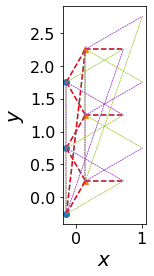

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
M.lat.plot_sites(ax)
M.coupling_terms['t1 Cd_i C_j'].plot_coupling_terms(ax, M.lat)
M.coupling_terms['t2 Cd_i C_j'].plot_coupling_terms(ax, M.lat)
import pprint
# pprint.pprint(list(M.coupling_terms['t1 Cd_i C_j'].to_TermList()))
pprint.pprint(list(M.coupling_terms['t2 Cd_i C_j'].to_TermList()))
ax.set_aspect(1.)
plt.show()

Once we have our model set up, we can proceed with running the infinite density matrix renormalization group simulation. As in Fig. 2.(a,b) we vary the flux from $\Phi=0$ to $2\pi$ in steps of $2\pi/10$. We save the data that we need for the expected charge on the left half of the cylinder $\langle Q_\text{L} \rangle$ and the entanglement energies $\epsilon_\alpha$ labelled by their $U(1)$ charge eigenvalues. The bond dimension in the paper is $\chi=400$.

In the interests of time, we will use instead $L_x \times L_y = 1\times 3$, $\chi=100$, $\Delta\Phi/2\pi=0.1$. Throughout this tutorial, we will typically use more modest parameters than in the paper, provided that they still demonstrate the physics.  

WARNING: The following cell may take several minutes to run.

In [7]:
import numpy as np
from tenpy.algorithms import dmrg
from tenpy.networks.mps import MPS

data1 = dict(phi_ext=np.linspace(0, 1.0, 11), QL=[], ent_spectrum=[])

dmrg_params = {
    'mixer': True, # setting this to True helps to escape local minima
    'mixer_params': {'amplitude': 1.e-5, 'decay': 1.2, 'disable_after': 30},
    'trunc_params': {
        'chi_max': 100,
        'svd_min': 1.e-10,
    },
    'chi_list': {0: 9, 10: 49, 20: 100},
    'max_E_err': 1.e-10,
    'max_S_err': 1.e-6,
    'max_sweeps': 150,
    'verbose': 1.,
    'combine': True
}

prod_state = ['full', 'empty'] * (model_params['Lx'] * model_params['Ly'] * 2 // 2)

eng = None
for phi in np.linspace(0, 1.0, 11):
    print("="*100)
    print("phi_ext = ", phi)
    model_params['phi_ext'] = phi
    if eng is None:  # first time in the loop
        M = FermionicHaldaneModel(model_params)
        psi = MPS.from_product_state(M.lat.mps_sites(), prod_state, bc=M.lat.bc_MPS)
        eng = dmrg.TwoSiteDMRGEngine(psi, M, dmrg_params)
    else:
        del eng.options['chi_list']
        M = FermionicHaldaneModel(model_params)
        eng.init_env(model=M)
    E, psi = eng.run()
    data1['QL'].append(psi.average_charge(bond=0)[0])
    data1['ent_spectrum'].append(psi.entanglement_spectrum(by_charge=True)[0])

phi_ext =  0.0
Reading 'explicit_plus_hc'=False for config FermionicHaldaneModel
Reading 'bc_MPS'='infinite' for config FermionicHaldaneModel
Reading 'order'='default' for config FermionicHaldaneModel
Reading 'conserve'='N' for config FermionicHaldaneModel
Reading 'bc_x'='periodic' for config FermionicHaldaneModel
Reading 'Lx'=1 for config FermionicHaldaneModel
Reading 'Ly'=3 for config FermionicHaldaneModel
Reading 'bc_y'='cylinder' for config FermionicHaldaneModel
Reading 't1'=-1.0 for config FermionicHaldaneModel
Reading 't2'=(-0.25-0.19245008972987523j) for config FermionicHaldaneModel
Reading 'V'=0 for config FermionicHaldaneModel
Reading 'mu'=0.0 for config FermionicHaldaneModel
Reading 'phi_ext'=0.0 for config FermionicHaldaneModel
Reading 'sort_mpo_legs'=False for config FermionicHaldaneModel
Reading 'combine'=True for config TwoSiteDMRGEngine
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Reading 'chi_list'={0: 9, 10: 49, 20: 100} for

Updating environment
.....
sweep 40, age = 2202
Energy = -0.8463431424361829, S = 1.3837432081650602, norm_err = 9.4e-11
Current memory usage 162.9 MB, time elapsed: 37.5 s
Delta E = -4.9832e-13, Delta S = 4.7112e-09 (per sweep)
max_trunc_err = 7.2844e-08, max_E_trunc = 6.9709e-07
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
DMRG finished after 40 sweeps.
total size = 2202, maximum chi = 100
phi_ext =  0.30000000000000004
Reading 'explicit_plus_hc'=False for config FermionicHaldaneModel
Reading 'bc_MPS'='infinite' for config FermionicHaldaneModel
Reading 'order'='default' for config FermionicHaldaneModel
Reading 'conserve'='N' for config FermionicHaldaneModel
Reading 'bc_x'='periodic' for config FermionicHaldaneModel
Reading 'Lx'=1 for config FermionicHaldaneModel
Reading 'Ly'=3 for config FermionicHaldaneModel
Reading 'bc_y'='cylinder' for config FermionicHaldaneModel
Reading 't1'=-1.0 for config FermionicHaldaneModel
Reading 't2'=(-0.25-0.19245008972987523j) for config Fermion

.....
sweep 30, age = 4218
Energy = -0.8417765269485168, S = 1.3866604088142889, norm_err = 6.0e-10
Current memory usage 162.9 MB, time elapsed: 28.5 s
Delta E = -1.5850e-09, Delta S = nan (per sweep)
max_trunc_err = 5.9214e-07, max_E_trunc = 2.6338e-06
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
Updating environment
.....
sweep 40, age = 4398
Energy = -0.8417765269681846, S = 1.3866605067282016, norm_err = 5.9e-10
Current memory usage 162.9 MB, time elapsed: 33.8 s
Delta E = -1.9668e-12, Delta S = 9.7914e-09 (per sweep)
max_trunc_err = 2.9576e-07, max_E_trunc = 2.6338e-06
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
DMRG finished after 40 sweeps.
total size = 4398, maximum chi = 100
phi_ext =  0.6000000000000001
Reading 'explicit_plus_hc'=False for config FermionicHaldaneModel
Reading 'bc_MPS'='infinite' for config FermionicHaldaneModel
Reading 'order'='default' for config FermionicHaldaneModel
Reading 'conserve'='N' for config FermionicHaldaneModel
Reading 'bc_x'='peri

disable mixer after 30 sweeps, final amplitude 4.21e-08
Updating environment
.....
sweep 30, age = 6414
Energy = -0.8463431427407310, S = 1.3837432399183569, norm_err = 9.3e-11
Current memory usage 162.9 MB, time elapsed: 27.9 s
Delta E = -3.8780e-09, Delta S = nan (per sweep)
max_trunc_err = 1.4698e-07, max_E_trunc = 6.9748e-07
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
Updating environment
.....
sweep 40, age = 6594
Energy = -0.8463431427474006, S = 1.3837432850540992, norm_err = 9.6e-11
Current memory usage 162.9 MB, time elapsed: 33.1 s
Delta E = -6.6697e-13, Delta S = 4.5136e-09 (per sweep)
max_trunc_err = 7.2863e-08, max_E_trunc = 6.9751e-07
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
DMRG finished after 40 sweeps.
total size = 6594, maximum chi = 100
phi_ext =  0.9
Reading 'explicit_plus_hc'=False for config FermionicHaldaneModel
Reading 'bc_MPS'='infinite' for config FermionicHaldaneModel
Reading 'order'='default' for config FermionicHaldaneModel
Reading 'conse

We can then plot the charge pumping to recover Fig. 2.(a)...

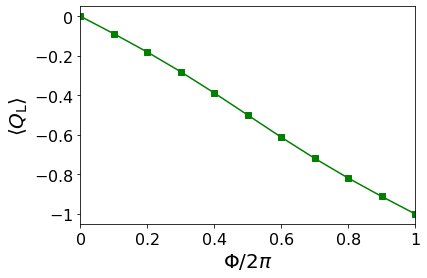

In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.plot(data1['phi_ext'], data1['QL'], marker='s', c='g')
ax.set_xlabel(r"$\Phi / 2 \pi$", fontsize=20)
ax.set_ylabel(r"$ \langle Q_\mathrm{L} \rangle $", fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.set_xlim([0, 1])
plt.show()

...and the spectral flow to recover Fig. 2.(b):

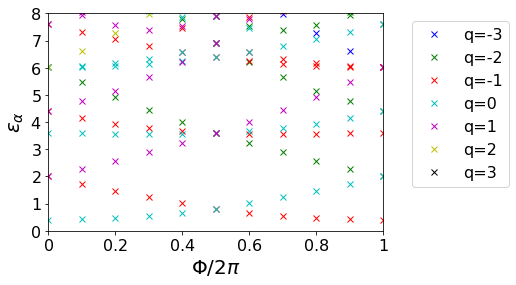

In [134]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
color_by_charge = {}
for phi_ext, spectrum in zip(data1['phi_ext'], data1['ent_spectrum']):
    for q, s in spectrum:
        if q > -4:
            q = q[0]
            label = ""
            if q not in color_by_charge:
                label = "q={q:d}".format(q=q)
                color_by_charge[q] = colors[len(color_by_charge) % len(colors)]
            color = color_by_charge[q]
            ax.plot(phi_ext*np.ones(s.shape), s,
                    linestyle='', marker='x', color=color, label=label)
ax.set_xlabel(r"$\Phi / 2 \pi$", fontsize=20)
ax.set_ylabel(r"$ \epsilon_\alpha $", fontsize=20)
ax.set_ylim(0., 8.)
ax.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.4, 1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.set_xlim([0, 1])
plt.show()

## Figure 2.(c,d)

In the above section, we have demonstrated the integer quantum Hall effect via charge pumping and spectral flow. The integer quantum Hall effect is a non-interacting phenomenon, which is why we set $V_1=0$ in the above. The main motivation for this paper is however to realize the fractional quantum Hall effect. In order to observe fractional quantum Hall states, we require (among other things) sufficiently flat topological bands. We select $t_1,t_2,\phi$ parameters to obtain a flat lower band, as shown in Fig. 1.(c). In the above section, this was not neccessary, however for fractional phases we often require $\Delta\ll V_1 \ll W$, where $\Delta$ is the band gap and $W$ is the band width. Previously, we completely filled this lower band with non-interacting fermions. Now, we fill this band to $1/3$ filling with interacting fermions. We therefore change $V_1=1$ and take a larger system size of $L_x\times L_y = 1\times 12$. The bond dimension is $\chi=500$ in the paper.

Although it is possible to simply change the parameters in the above example and reproduce Fig. 2.(c,d), this may take several days to run. Instead, in this tutorial we are going to going to approach the problem naively, the way someone might approach it in the first instance. Specifically, there are several questions that one should ask while running these simultations.

### Is the flow adiabatic?

In the integer quantum Hall example above, we choose a $\Phi/2\pi$ step size of $0.1$. This is sufficiently small so that the flow is adiabatic on each step. You can check that the flow is adiabatic on each step by taking the overlap of a state at $\Phi=\Phi_0$ and $\Phi=\Phi_0+\Delta\Phi$. If your state fluctuates widely from one $\Phi$ value to the next, it may be worth reducing the $\Phi$ step.

### Is the $L_y$ value appropriate?

We may naively attempt to fill the lower band to $1/3$ filling with interacting fermions and compute the charge pumping as follows... 

WARNING: The following cell may take several **hours** to run.

In [149]:
data2 = dict(phi_ext=np.linspace(0, 3.0, 31), QL=[], ent_spectrum=[])

model_params = dict(conserve='N',
                    Lx=1, Ly=3,
                    t1=-1., mu=0, V=1., phi_ext=0.,
                    bc_MPS='infinite', bc_y='cylinder', verbose=0)

dmrg_params = {
    'mixer': True, # setting this to True helps to escape local minima
    'mixer_params': {'amplitude': 1.e-5, 'decay': 1.2, 'disable_after': 30},
    'trunc_params': {
        # 'chi_max': 200,
        'svd_min': 1.e-10,
    },
    'lanczos_params': {
        # 'reortho': True,
        # 'N_cache': 40
        'cutoff': 1.e-13  # fixes theta=0 error
    },
    'chi_list': {0: 9, 10: 49, 20: 100, 40: 200},
    'max_E_err': 1.e-6,
    'max_S_err': 1.e-6,
    'max_sweeps': 1000,
    'verbose': 1.,
    'N_sweeps_check': 10,  # default=10
    'diag_method': 'default',
    'combine' : True
}

# dmrg_params = {
#     'mixer': True,  # setting this to True helps to escape local minima
#     'mixer_params': {
#         'amplitude': 1.e-5,
#         'decay': 1.2,
#         'disable_after': 30
#     },
#     'trunc_params': {
#         'chi_max': 200,
#         'svd_min': 1.e-10,
#     },
#     'max_E_err': 1.e-8,
#     'max_S_err': 1.e-6,
#     'max_sweeps': 150,
#     'verbose': 1,
#     'combine': True
# }

prod_state = [1,0,0,0,0,0]

eng = None
for phi in np.linspace(0, 3.0, 31):
    print("="*100)
    print("phi_ext = ", phi)
    model_params['phi_ext'] = phi
    if eng is None:  # first time in the loop
        M = FermionicHaldaneModel(model_params)
        psi = MPS.from_product_state(M.lat.mps_sites(), prod_state, bc=M.lat.bc_MPS)
        eng = dmrg.TwoSiteDMRGEngine(psi, M, dmrg_params)
    else:
        del eng.options['chi_list']
        M = FermionicHaldaneModel(model_params)
        eng.init_env(model=M)
    E, psi = eng.run()
    data2['QL'].append(psi.average_charge(bond=0)[0])
    data2['ent_spectrum'].append(psi.entanglement_spectrum(by_charge=True)[0])

phi_ext =  0.0
Reading 'combine'=True for config TwoSiteDMRGEngine
Subconfig 'lanczos_params'=Config(<2 options>, 'lanczos_params') for config TwoSiteDMRGEngine
Subconfig 'trunc_params'=Config(<2 options>, 'trunc_params') for config TwoSiteDMRGEngine
Reading 'chi_list'={0: 9, 10: 49, 20: 100, 40: 200} for config TwoSiteDMRGEngine
Setting chi_max = 9
Initial sweeps...
Updating environment
.
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'diag_method'='default' for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Setting chi_max = 49
Updating environment
.....
sweep 10, age = 198
Energy = -0.3772145996883485, S = nan, norm_err = 2.7e-02
Current memory usage 696.6 MB, time elapsed: 4.8 s
Delta E

Updating environment
.....
sweep 190, age = 3438
Energy = -0.4500789438980443, S = 2.7863937661366349, norm_err = 1.3e-01
Current memory usage 696.6 MB, time elapsed: 445.2 s
Delta E = -3.6930e-03, Delta S = -1.9548e-02 (per sweep)
max_trunc_err = 3.8381e-06, max_E_trunc = 1.5731e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 200, age = 3618
Energy = -0.3963747632162533, S = 2.9953464882929435, norm_err = 9.3e-02
Current memory usage 696.6 MB, time elapsed: 472.8 s
Delta E = 5.3704e-03, Delta S = 2.0895e-02 (per sweep)
max_trunc_err = 1.8506e-06, max_E_trunc = 1.0915e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 3798
Energy = -0.4429659155524632, S = 3.2013510284853215, norm_err = 1.1e-01
Current memory usage 696.6 MB, time elapsed: 500.2 s
Delta E = -4.6591e-03, Delta S = 2.0600e-02 (per sweep)
max_trunc_err = 2.2521e-06, max_E_trunc = 1.4724e-05
MPS bond dimensions: [200, 200, 200, 200, 20

Updating environment
.....
sweep 390, age = 7038
Energy = -0.4496272321127511, S = 3.0425127046807687, norm_err = 1.2e-01
Current memory usage 696.6 MB, time elapsed: 985.7 s
Delta E = 1.1444e-03, Delta S = 4.4575e-02 (per sweep)
max_trunc_err = 2.5386e-06, max_E_trunc = 1.5382e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 400, age = 7218
Energy = -0.4151594998590251, S = 3.1984849792763832, norm_err = 9.2e-02
Current memory usage 696.6 MB, time elapsed: 1012.0 s
Delta E = 3.4468e-03, Delta S = 1.5597e-02 (per sweep)
max_trunc_err = 2.6433e-06, max_E_trunc = 1.3146e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 7398
Energy = -0.4450433931776843, S = 2.7603259524751693, norm_err = 1.1e-01
Current memory usage 696.6 MB, time elapsed: 1038.5 s
Delta E = -2.9884e-03, Delta S = -4.3816e-02 (per sweep)
max_trunc_err = 3.1350e-06, max_E_trunc = 1.1350e-05
MPS bond dimensions: [200, 200, 200, 200, 2

Updating environment
.....
sweep 590, age = 10638
Energy = -0.4024052674633367, S = 3.1113468695290600, norm_err = 5.5e-02
Current memory usage 696.6 MB, time elapsed: 1511.4 s
Delta E = -1.1792e-03, Delta S = -3.1687e-02 (per sweep)
max_trunc_err = 5.0105e-06, max_E_trunc = 1.3980e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 600, age = 10818
Energy = -0.4066701953989498, S = 3.3237901809141284, norm_err = 9.9e-02
Current memory usage 696.6 MB, time elapsed: 1537.6 s
Delta E = -4.2649e-04, Delta S = 2.1244e-02 (per sweep)
max_trunc_err = 1.8151e-06, max_E_trunc = 1.3605e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 10998
Energy = -0.4676035639726403, S = 2.7784931777555215, norm_err = 1.2e-01
Current memory usage 696.6 MB, time elapsed: 1563.8 s
Delta E = -6.0933e-03, Delta S = -5.4530e-02 (per sweep)
max_trunc_err = 2.6818e-06, max_E_trunc = 1.3509e-05
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 790, age = 14238
Energy = -0.4030231369076773, S = 3.0720105890011911, norm_err = 8.1e-02
Current memory usage 696.6 MB, time elapsed: 2035.4 s
Delta E = -1.3746e-04, Delta S = -1.1081e-02 (per sweep)
max_trunc_err = 6.3392e-06, max_E_trunc = 1.2363e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 800, age = 14418
Energy = -0.4264238565851126, S = 2.8461643307815927, norm_err = 8.2e-02
Current memory usage 696.6 MB, time elapsed: 2061.8 s
Delta E = -2.3401e-03, Delta S = -2.2585e-02 (per sweep)
max_trunc_err = 4.1205e-06, max_E_trunc = 1.0365e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 14598
Energy = -0.4045649473970722, S = 3.3972761882534570, norm_err = 9.1e-02
Current memory usage 696.6 MB, time elapsed: 2088.1 s
Delta E = 2.1859e-03, Delta S = 5.5111e-02 (per sweep)
max_trunc_err = 1.9093e-06, max_E_trunc = 1.4941e-05
MPS bond dimensions: [200, 200, 200, 

Updating environment
.....
sweep 990, age = 17838
Energy = -0.3838730716580964, S = 3.2057847391825560, norm_err = 7.1e-02
Current memory usage 696.6 MB, time elapsed: 2562.4 s
Delta E = 4.4702e-03, Delta S = 7.4880e-02 (per sweep)
max_trunc_err = 6.3643e-06, max_E_trunc = 1.2062e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 1000, age = 18018
Energy = -0.4326734122228117, S = 3.1587906001568697, norm_err = 1.2e-01
Current memory usage 696.6 MB, time elapsed: 2588.6 s
Delta E = -4.8800e-03, Delta S = -4.6994e-03 (per sweep)
max_trunc_err = 2.2198e-06, max_E_trunc = 1.2559e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=1.19e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.95e-05
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 18318, maximum chi = 200
phi_ext =  0.1
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 18510
Energy = -0.4080091378229251, S = nan, norm_err = 2.0e-01
Current memory usage 696.8 MB, time elapsed: 34.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1039e-06, max_E_trunc = 3.9068e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 18690
Energy = -0.3476544515027247, S = nan, norm_err = 2.1e-01
Current memory usage 696.8 MB, time elapsed: 67.4 s
Delta E = 6.0355e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7141e-07, max_E_trunc = 2.2242e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
disable m

Updating environment
.....
sweep 200, age = 21930
Energy = -0.4063970615329708, S = 2.7714032585193453, norm_err = 2.3e-01
Current memory usage 696.8 MB, time elapsed: 546.1 s
Delta E = 3.3257e-04, Delta S = -5.9824e-02 (per sweep)
max_trunc_err = 1.8147e-06, max_E_trunc = 2.1159e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 22110
Energy = -0.4077255450103318, S = 2.6449533922941355, norm_err = 3.3e-01
Current memory usage 696.8 MB, time elapsed: 570.7 s
Delta E = -1.3285e-04, Delta S = -1.2645e-02 (per sweep)
max_trunc_err = 2.9289e-07, max_E_trunc = 1.8690e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 220, age = 22290
Energy = -0.4455656243556708, S = 2.5467850833028698, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 597.5 s
Delta E = -3.7840e-03, Delta S = -9.8168e-03 (per sweep)
max_trunc_err = 2.4828e-07, max_E_trunc = 2.3919e-06
MPS bond dimensions: [200, 200, 200, 20

Updating environment
.....
sweep 400, age = 25530
Energy = -0.4388535520338337, S = 2.7031200987949675, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 1073.3 s
Delta E = -2.7731e-03, Delta S = 6.4622e-03 (per sweep)
max_trunc_err = 2.7331e-07, max_E_trunc = 2.3452e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 25710
Energy = -0.4215354479032006, S = 2.6608266850365716, norm_err = 3.3e-01
Current memory usage 696.8 MB, time elapsed: 1099.9 s
Delta E = 1.7318e-03, Delta S = -4.2293e-03 (per sweep)
max_trunc_err = 2.6292e-07, max_E_trunc = 2.5112e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 420, age = 25890
Energy = -0.4315298721382230, S = 2.4775408954487101, norm_err = 3.5e-01
Current memory usage 696.8 MB, time elapsed: 1126.5 s
Delta E = -9.9944e-04, Delta S = -1.8329e-02 (per sweep)
max_trunc_err = 2.8151e-07, max_E_trunc = 2.5904e-06
MPS bond dimensions: [200, 200, 200, 

Updating environment
.....
sweep 600, age = 29130
Energy = -0.4323027403699295, S = 2.9966731670297162, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 1604.5 s
Delta E = 8.1479e-04, Delta S = 5.4636e-02 (per sweep)
max_trunc_err = 6.8275e-07, max_E_trunc = 2.5364e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 29310
Energy = -0.3845496032560429, S = 2.8107883337648154, norm_err = 2.1e-01
Current memory usage 696.8 MB, time elapsed: 1630.6 s
Delta E = 4.7753e-03, Delta S = -1.8588e-02 (per sweep)
max_trunc_err = 8.9510e-07, max_E_trunc = 1.8525e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 620, age = 29490
Energy = -0.4102845642545010, S = 2.8058200777435389, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 1656.2 s
Delta E = -2.5735e-03, Delta S = -4.9683e-04 (per sweep)
max_trunc_err = 2.2178e-07, max_E_trunc = 2.1696e-06
MPS bond dimensions: [200, 200, 200, 2

Updating environment
.....
sweep 800, age = 32730
Energy = -0.3705781125036083, S = 3.1351379427111588, norm_err = 1.7e-01
Current memory usage 696.8 MB, time elapsed: 2136.0 s
Delta E = 2.2460e-03, Delta S = 1.3073e-02 (per sweep)
max_trunc_err = 9.1076e-07, max_E_trunc = 2.3005e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 32910
Energy = -0.4237358248348452, S = 2.4890476133054675, norm_err = 3.4e-01
Current memory usage 696.8 MB, time elapsed: 2161.8 s
Delta E = -5.3158e-03, Delta S = -6.4609e-02 (per sweep)
max_trunc_err = 2.6766e-07, max_E_trunc = 2.4323e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 820, age = 33090
Energy = -0.4460553474774921, S = 2.9037809460986979, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 2188.8 s
Delta E = -2.2320e-03, Delta S = 4.1473e-02 (per sweep)
max_trunc_err = 2.9152e-07, max_E_trunc = 2.5588e-06
MPS bond dimensions: [200, 200, 200, 2

Updating environment
.....
sweep 1000, age = 36330
Energy = -0.4181823003888591, S = 2.9332643300365202, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 2670.1 s
Delta E = 5.1428e-03, Delta S = 3.8441e-02 (per sweep)
max_trunc_err = 3.0536e-07, max_E_trunc = 2.5821e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=3.00e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.25e-03
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 36630, maximum chi = 200
phi_ext =  0.2
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 36822
Energy = -0.4622227049779515, S = nan, norm_err = 1.6e-01
Current memory usage 696.8 MB, time elapsed: 34.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4974e-06, max_E_trunc = 3.0044e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 37002
Energy = -0.4389747831937711, S = nan, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 66.1 s
Delta E = 2.3248e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9245e-06, max_E_trunc = 2.2262e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
disable m

Updating environment
.....
sweep 200, age = 40242
Energy = -0.4288816325082128, S = 2.7366960505039954, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 546.0 s
Delta E = 2.4740e-03, Delta S = 1.6990e-02 (per sweep)
max_trunc_err = 4.7343e-07, max_E_trunc = 2.3996e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 40422
Energy = -0.4633326177884858, S = 2.5019470850192538, norm_err = 3.3e-01
Current memory usage 696.8 MB, time elapsed: 572.8 s
Delta E = -3.4451e-03, Delta S = -2.3475e-02 (per sweep)
max_trunc_err = 3.3569e-07, max_E_trunc = 2.3365e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 220, age = 40602
Energy = -0.4853786985146750, S = 2.6014606166322665, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 599.9 s
Delta E = -2.2046e-03, Delta S = 9.9514e-03 (per sweep)
max_trunc_err = 3.6627e-07, max_E_trunc = 2.2690e-06
MPS bond dimensions: [200, 200, 200, 200,

Updating environment
.....
sweep 400, age = 43842
Energy = -0.4375224762012901, S = 2.4560806744552526, norm_err = 3.4e-01
Current memory usage 696.8 MB, time elapsed: 1077.4 s
Delta E = 1.5425e-03, Delta S = -3.3804e-02 (per sweep)
max_trunc_err = 3.5310e-07, max_E_trunc = 2.5790e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 44022
Energy = -0.4562565963463688, S = 2.4939526523802251, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 1103.8 s
Delta E = -1.8734e-03, Delta S = 3.7872e-03 (per sweep)
max_trunc_err = 3.9774e-07, max_E_trunc = 2.3774e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 420, age = 44202
Energy = -0.4547124525276255, S = 2.5717614361379995, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 1130.4 s
Delta E = 1.5441e-04, Delta S = 7.7809e-03 (per sweep)
max_trunc_err = 4.5362e-07, max_E_trunc = 2.3901e-06
MPS bond dimensions: [200, 200, 200, 20

Updating environment
.....
sweep 600, age = 47442
Energy = -0.4423397043477356, S = 2.7817215968738012, norm_err = 2.4e-01
Current memory usage 696.8 MB, time elapsed: 1607.9 s
Delta E = -4.2740e-05, Delta S = 3.3055e-03 (per sweep)
max_trunc_err = 2.8086e-07, max_E_trunc = 1.9262e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 47622
Energy = -0.4356591592046850, S = 2.7583929158750098, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 1634.4 s
Delta E = 6.6805e-04, Delta S = -2.3329e-03 (per sweep)
max_trunc_err = 3.0702e-07, max_E_trunc = 2.2983e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 620, age = 47802
Energy = -0.4579742558620031, S = 2.4215122204130490, norm_err = 3.3e-01
Current memory usage 696.8 MB, time elapsed: 1660.8 s
Delta E = -2.2315e-03, Delta S = -3.3688e-02 (per sweep)
max_trunc_err = 2.6214e-07, max_E_trunc = 2.2527e-06
MPS bond dimensions: [200, 200, 200, 

Updating environment
.....
sweep 800, age = 51042
Energy = -0.4176270784003767, S = 3.1637307428586179, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 2138.5 s
Delta E = 2.0952e-03, Delta S = 2.8549e-02 (per sweep)
max_trunc_err = 3.5160e-07, max_E_trunc = 2.4741e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 51222
Energy = -0.4300178966323074, S = 2.6251410197051777, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 2165.1 s
Delta E = -1.2391e-03, Delta S = -5.3859e-02 (per sweep)
max_trunc_err = 2.4280e-07, max_E_trunc = 2.0663e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 820, age = 51402
Energy = -0.4425502188735966, S = 2.3563625277979101, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 2191.7 s
Delta E = -1.2532e-03, Delta S = -2.6878e-02 (per sweep)
max_trunc_err = 3.5904e-07, max_E_trunc = 2.5531e-06
MPS bond dimensions: [200, 200, 200, 

Updating environment
.....
sweep 1000, age = 54642
Energy = -0.3982076029020997, S = 2.8196595621550897, norm_err = 2.4e-01
Current memory usage 696.8 MB, time elapsed: 2666.3 s
Delta E = 7.7770e-03, Delta S = 3.9480e-02 (per sweep)
max_trunc_err = 3.4058e-07, max_E_trunc = 2.3412e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=2.37e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 9.91e-04
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 54942, maximum chi = 200
phi_ext =  0.30000000000000004
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 55134
Energy = -0.4606083369687137, S = nan, norm_err = 3.6e-01
Current memory usage 696.8 MB, time elapsed: 34.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1058e-06, max_E_trunc = 3.5931e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 55314
Energy = -0.4861901117231658, S = nan, norm_err = 3.5e-01
Current memory usage 696.8 MB, time elapsed: 67.1 s
Delta E = -2.5582e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.8859e-07, max_E_trunc = 3.1155e-06
MPS bond dimensions: [200, 200, 200, 200, 20

Updating environment
.....
sweep 200, age = 58554
Energy = -0.4156016949051870, S = 2.6107143490050020, norm_err = 2.4e-01
Current memory usage 696.8 MB, time elapsed: 546.7 s
Delta E = 1.0248e-02, Delta S = 2.9179e-02 (per sweep)
max_trunc_err = 8.9374e-07, max_E_trunc = 2.1115e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 58734
Energy = -0.4259433181641725, S = 2.8907276227959184, norm_err = 1.9e-01
Current memory usage 696.8 MB, time elapsed: 572.6 s
Delta E = -1.0342e-03, Delta S = 2.8001e-02 (per sweep)
max_trunc_err = 7.2927e-07, max_E_trunc = 2.2677e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 220, age = 58914
Energy = -0.4907076049045524, S = 2.5203735381201411, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 598.3 s
Delta E = -6.4764e-03, Delta S = -3.7035e-02 (per sweep)
max_trunc_err = 6.0596e-07, max_E_trunc = 2.0014e-06
MPS bond dimensions: [200, 200, 200, 200,

Updating environment
.....
sweep 400, age = 62154
Energy = -0.3901375947082973, S = 2.9886519743106099, norm_err = 2.4e-01
Current memory usage 696.8 MB, time elapsed: 1072.4 s
Delta E = 5.1754e-03, Delta S = -9.9015e-03 (per sweep)
max_trunc_err = 3.6704e-07, max_E_trunc = 2.0116e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 62334
Energy = -0.4553233327984951, S = 2.6764042364199536, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 1098.5 s
Delta E = -6.5186e-03, Delta S = -3.1225e-02 (per sweep)
max_trunc_err = 4.4360e-07, max_E_trunc = 2.1478e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 420, age = 62514
Energy = -0.4890910753504916, S = 2.4670957649927083, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 1125.2 s
Delta E = -3.3768e-03, Delta S = -2.0931e-02 (per sweep)
max_trunc_err = 2.3179e-07, max_E_trunc = 2.2090e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 600, age = 65754
Energy = -0.4015453901920409, S = 2.9714466071624930, norm_err = 1.8e-01
Current memory usage 696.8 MB, time elapsed: 1598.7 s
Delta E = 8.2494e-03, Delta S = 3.5985e-02 (per sweep)
max_trunc_err = 5.4137e-07, max_E_trunc = 2.2002e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 65934
Energy = -0.4762187617385886, S = 2.7395671721328907, norm_err = 2.6e-01
Current memory usage 696.8 MB, time elapsed: 1624.7 s
Delta E = -7.4673e-03, Delta S = -2.3188e-02 (per sweep)
max_trunc_err = 3.1261e-07, max_E_trunc = 2.1144e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 620, age = 66114
Energy = -0.5153127418410198, S = 2.4373011920507905, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 1651.2 s
Delta E = -3.9094e-03, Delta S = -3.0227e-02 (per sweep)
max_trunc_err = 3.7555e-07, max_E_trunc = 2.3916e-06
MPS bond dimensions: [200, 200, 200, 

Updating environment
.....
sweep 800, age = 69354
Energy = -0.4920575485411973, S = 2.4502566943727677, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 2128.3 s
Delta E = -5.4597e-03, Delta S = -3.0999e-02 (per sweep)
max_trunc_err = 2.3894e-07, max_E_trunc = 2.2228e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 69534
Energy = -0.4835136005694949, S = 2.7460915673526674, norm_err = 2.3e-01
Current memory usage 696.8 MB, time elapsed: 2155.1 s
Delta E = 8.5439e-04, Delta S = 2.9583e-02 (per sweep)
max_trunc_err = 2.8451e-07, max_E_trunc = 2.5748e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 820, age = 69714
Energy = -0.4273357695522766, S = 2.6692716376467551, norm_err = 2.3e-01
Current memory usage 696.8 MB, time elapsed: 2181.6 s
Delta E = 5.6178e-03, Delta S = -7.6820e-03 (per sweep)
max_trunc_err = 4.4924e-07, max_E_trunc = 1.9967e-06
MPS bond dimensions: [200, 200, 200, 2

Updating environment
.....
sweep 1000, age = 72954
Energy = -0.4565085689828265, S = 2.9708097112731973, norm_err = 1.9e-01
Current memory usage 696.8 MB, time elapsed: 2659.0 s
Delta E = -2.3009e-03, Delta S = -5.7804e-03 (per sweep)
max_trunc_err = 1.2339e-06, max_E_trunc = 1.9930e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=1.86e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 9.28e-04
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 73254, maximum chi = 200
phi_ext =  0.4
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 73446
Energy = -0.4900045834583580, S = nan, norm_err = 2.1e-01
Current memory usage 696.8 MB, time elapsed: 31.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2145e-07, max_E_trunc = 3.5588e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 73626
Energy = -0.5090200259607324, S = nan, norm_err = 3.4e-01
Current memory usage 696.8 MB, time elapsed: 64.4 s
Delta E = -1.9015e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.7590e-07, max_E_trunc = 2.5459e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
disable 

Updating environment
.....
sweep 200, age = 76866
Energy = -0.4503476736784554, S = 3.0646587564156533, norm_err = 1.4e-01
Current memory usage 696.8 MB, time elapsed: 542.7 s
Delta E = 1.5957e-04, Delta S = 6.1699e-03 (per sweep)
max_trunc_err = 6.2630e-07, max_E_trunc = 1.8781e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 77046
Energy = -0.4506918705998639, S = 2.8216673759957001, norm_err = 1.3e-01
Current memory usage 696.8 MB, time elapsed: 569.0 s
Delta E = -3.4420e-05, Delta S = -2.4299e-02 (per sweep)
max_trunc_err = 6.4426e-07, max_E_trunc = 3.1586e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 220, age = 77226
Energy = -0.5431792153940478, S = 2.3978652927267174, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 594.8 s
Delta E = -9.2487e-03, Delta S = -4.2380e-02 (per sweep)
max_trunc_err = 2.7164e-07, max_E_trunc = 2.2718e-06
MPS bond dimensions: [200, 200, 200, 200

Updating environment
.....
sweep 400, age = 80466
Energy = -0.4934798556466073, S = 2.1848609763077307, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 1071.4 s
Delta E = 4.3304e-03, Delta S = -2.0912e-02 (per sweep)
max_trunc_err = 2.5319e-07, max_E_trunc = 2.0818e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 80646
Energy = -0.5237360268632377, S = 2.3432792588340532, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 1098.4 s
Delta E = -3.0256e-03, Delta S = 1.5842e-02 (per sweep)
max_trunc_err = 2.4298e-06, max_E_trunc = 1.8539e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 420, age = 80826
Energy = -0.4854086417320407, S = 2.7553827203092154, norm_err = 2.4e-01
Current memory usage 696.8 MB, time elapsed: 1124.0 s
Delta E = 3.8327e-03, Delta S = 4.1210e-02 (per sweep)
max_trunc_err = 9.0256e-07, max_E_trunc = 2.0076e-06
MPS bond dimensions: [200, 200, 200, 20

Updating environment
.....
sweep 600, age = 84066
Energy = -0.4801585913191957, S = 2.4424258199811111, norm_err = 3.6e-01
Current memory usage 696.8 MB, time elapsed: 1598.1 s
Delta E = 1.8287e-03, Delta S = -5.7659e-03 (per sweep)
max_trunc_err = 4.2103e-07, max_E_trunc = 2.0964e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 84246
Energy = -0.4868943528078186, S = 2.4499435072129985, norm_err = 3.5e-01
Current memory usage 696.8 MB, time elapsed: 1624.6 s
Delta E = -6.7358e-04, Delta S = 7.5177e-04 (per sweep)
max_trunc_err = 7.4966e-07, max_E_trunc = 2.9179e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 620, age = 84426
Energy = -0.5321307723243081, S = 2.7970382519316233, norm_err = 2.1e-01
Current memory usage 696.8 MB, time elapsed: 1651.0 s
Delta E = -4.5236e-03, Delta S = 3.4709e-02 (per sweep)
max_trunc_err = 4.9583e-07, max_E_trunc = 3.0459e-06
MPS bond dimensions: [200, 200, 200, 2

Updating environment
.....
sweep 800, age = 87666
Energy = -0.3986631760332481, S = 2.5089477534351596, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 2120.1 s
Delta E = -4.0158e-03, Delta S = -2.5558e-02 (per sweep)
max_trunc_err = 5.8231e-07, max_E_trunc = 2.1109e-06
MPS bond dimensions: [200, 198, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 87846
Energy = -0.4725102404669694, S = 2.1709636613617351, norm_err = 4.2e-01
Current memory usage 696.8 MB, time elapsed: 2145.7 s
Delta E = -7.3847e-03, Delta S = -3.3798e-02 (per sweep)
max_trunc_err = 3.8352e-07, max_E_trunc = 2.0075e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 820, age = 88026
Energy = -0.5399735180350641, S = 2.1035163382431250, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 2172.8 s
Delta E = -6.7463e-03, Delta S = -6.7447e-03 (per sweep)
max_trunc_err = 3.9104e-07, max_E_trunc = 2.4705e-06
MPS bond dimensions: [200, 200, 200

Updating environment
.....
sweep 1000, age = 91266
Energy = -0.4908684136492714, S = 2.5632361499411718, norm_err = 3.3e-01
Current memory usage 696.8 MB, time elapsed: 2642.4 s
Delta E = 1.6912e-04, Delta S = 2.0289e-02 (per sweep)
max_trunc_err = 6.4458e-07, max_E_trunc = 2.0455e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=3.27e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.66e-02
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 91566, maximum chi = 200
phi_ext =  0.5
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 91758
Energy = -0.3143042577400290, S = nan, norm_err = 8.1e-02
Current memory usage 696.8 MB, time elapsed: 33.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8947e-06, max_E_trunc = 3.7314e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 91938
Energy = -0.5623274814552133, S = nan, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 64.4 s
Delta E = -2.4802e-02, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7485e-06, max_E_trunc = 2.1100e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
disable 

Updating environment
.....
sweep 200, age = 95178
Energy = -0.5512370319914529, S = 2.2520286920192443, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 541.3 s
Delta E = -2.1883e-04, Delta S = -2.6092e-03 (per sweep)
max_trunc_err = 5.2112e-07, max_E_trunc = 3.1674e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 95358
Energy = -0.5505481280166956, S = 2.3396613294680209, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 567.7 s
Delta E = 6.8890e-05, Delta S = 8.7633e-03 (per sweep)
max_trunc_err = 4.9192e-07, max_E_trunc = 3.2117e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 220, age = 95538
Energy = -0.5521618108383942, S = 2.2828968157769238, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 594.2 s
Delta E = -1.6137e-04, Delta S = -5.6765e-03 (per sweep)
max_trunc_err = 5.8976e-07, max_E_trunc = 3.2188e-06
MPS bond dimensions: [200, 200, 200, 200

Updating environment
.....
sweep 400, age = 98778
Energy = -0.5312645885993940, S = 2.2982867037308319, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 1066.0 s
Delta E = -1.8162e-03, Delta S = 1.5517e-02 (per sweep)
max_trunc_err = 1.5054e-06, max_E_trunc = 2.9199e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 98958
Energy = -0.5502407228759694, S = 2.1374678442720638, norm_err = 3.4e-01
Current memory usage 696.8 MB, time elapsed: 1092.4 s
Delta E = -1.8976e-03, Delta S = -1.6082e-02 (per sweep)
max_trunc_err = 4.2856e-06, max_E_trunc = 2.4937e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 420, age = 99138
Energy = -0.5223184214470772, S = 2.2228135772180155, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 1118.0 s
Delta E = 2.7922e-03, Delta S = 8.5346e-03 (per sweep)
max_trunc_err = 3.1783e-06, max_E_trunc = 2.5068e-06
MPS bond dimensions: [200, 200, 200, 2

Updating environment
.....
sweep 600, age = 102378
Energy = -0.4424140727193541, S = 2.7274758511149102, norm_err = 2.3e-01
Current memory usage 696.8 MB, time elapsed: 1586.4 s
Delta E = 5.2563e-03, Delta S = 2.6298e-02 (per sweep)
max_trunc_err = 1.4697e-06, max_E_trunc = 1.9954e-06
MPS bond dimensions: [200, 199, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 102558
Energy = -0.5524775118325730, S = 2.3068597767432109, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 1610.8 s
Delta E = -1.1006e-02, Delta S = -4.2062e-02 (per sweep)
max_trunc_err = 4.3995e-07, max_E_trunc = 2.0780e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 620, age = 102738
Energy = -0.4822930216099242, S = 2.6712238954495056, norm_err = 3.9e-01
Current memory usage 696.8 MB, time elapsed: 1636.5 s
Delta E = 7.0184e-03, Delta S = 3.6436e-02 (per sweep)
max_trunc_err = 6.8420e-07, max_E_trunc = 2.6933e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 800, age = 105978
Energy = -0.5539951437537335, S = 2.2030997091948596, norm_err = 3.4e-01
Current memory usage 696.8 MB, time elapsed: 2104.6 s
Delta E = 9.0286e-05, Delta S = 4.5069e-03 (per sweep)
max_trunc_err = 5.2854e-06, max_E_trunc = 2.1417e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 106158
Energy = -0.5516909421464030, S = 2.1979129788239771, norm_err = 3.6e-01
Current memory usage 696.8 MB, time elapsed: 2130.0 s
Delta E = 2.3042e-04, Delta S = -5.1867e-04 (per sweep)
max_trunc_err = 3.4153e-06, max_E_trunc = 2.1490e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 820, age = 106338
Energy = -0.5386226458164552, S = 2.2385419381776503, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 2156.6 s
Delta E = 1.3068e-03, Delta S = 4.0629e-03 (per sweep)
max_trunc_err = 7.2943e-06, max_E_trunc = 2.5081e-06
MPS bond dimensions: [200, 200, 200, 

Updating environment
.....
sweep 1000, age = 109578
Energy = -0.4960834185094427, S = 2.4368930057388356, norm_err = 3.9e-01
Current memory usage 696.8 MB, time elapsed: 2625.7 s
Delta E = -4.6623e-03, Delta S = -4.7049e-02 (per sweep)
max_trunc_err = 2.6195e-07, max_E_trunc = 2.0360e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=3.90e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 7.10e-02
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 109878, maximum chi = 200
phi_ext =  0.6000000000000001
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 110070
Energy = -0.5021943696938251, S = nan, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 33.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.5970e-06, max_E_trunc = 2.6739e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 110250
Energy = -0.4803803622550428, S = nan, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 65.5 s
Delta E = 2.1814e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1991e-06, max_E_trunc = 2.0839e-06
MPS bond dimensions: [200, 200, 200, 200, 2

.....
sweep 190, age = 113310
Energy = -0.5142830806319884, S = 2.8483274899822830, norm_err = 2.0e-01
Current memory usage 696.8 MB, time elapsed: 514.2 s
Delta E = 1.7257e-03, Delta S = 4.8993e-02 (per sweep)
max_trunc_err = 5.4158e-07, max_E_trunc = 2.2069e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 200, age = 113490
Energy = -0.3939485169915618, S = 3.1427361795178297, norm_err = 2.0e-01
Current memory usage 696.8 MB, time elapsed: 540.3 s
Delta E = 1.2033e-02, Delta S = 2.9441e-02 (per sweep)
max_trunc_err = 5.6627e-07, max_E_trunc = 2.5785e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 113670
Energy = -0.4995267348834507, S = 2.5034731835701720, norm_err = 2.4e-01
Current memory usage 696.8 MB, time elapsed: 566.0 s
Delta E = -1.0558e-02, Delta S = -6.3926e-02 (per sweep)
max_trunc_err = 4.2239e-07, max_E_trunc = 2.0367e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating

Updating environment
.....
sweep 390, age = 116910
Energy = -0.5258320227361158, S = 2.2532534689856485, norm_err = 3.8e-01
Current memory usage 696.8 MB, time elapsed: 1037.9 s
Delta E = -6.8197e-03, Delta S = -4.5121e-02 (per sweep)
max_trunc_err = 4.3993e-07, max_E_trunc = 2.1803e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 400, age = 117090
Energy = -0.4874061218118489, S = 2.5035185987057651, norm_err = 2.4e-01
Current memory usage 696.8 MB, time elapsed: 1064.4 s
Delta E = 3.8426e-03, Delta S = 2.5027e-02 (per sweep)
max_trunc_err = 3.1310e-07, max_E_trunc = 1.9459e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 117270
Energy = -0.4773965049504720, S = 2.4609141433983077, norm_err = 3.3e-01
Current memory usage 696.8 MB, time elapsed: 1091.6 s
Delta E = 1.0010e-03, Delta S = -4.2604e-03 (per sweep)
max_trunc_err = 7.0864e-07, max_E_trunc = 1.9304e-06
MPS bond dimensions: [200, 200, 200

Updating environment
.....
sweep 590, age = 120510
Energy = -0.4357534070374338, S = 2.8762847130444409, norm_err = 1.6e-01
Current memory usage 696.8 MB, time elapsed: 1565.0 s
Delta E = 1.2335e-02, Delta S = 6.8710e-02 (per sweep)
max_trunc_err = 3.4604e-06, max_E_trunc = 2.3096e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 600, age = 120690
Energy = -0.5349172199991395, S = 2.2614174240491689, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 1588.8 s
Delta E = -9.9164e-03, Delta S = -6.1487e-02 (per sweep)
max_trunc_err = 1.2864e-06, max_E_trunc = 1.7390e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 120870
Energy = -0.4854975770958845, S = 2.4800495280831591, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 1614.5 s
Delta E = 4.9420e-03, Delta S = 2.1863e-02 (per sweep)
max_trunc_err = 4.5550e-07, max_E_trunc = 2.1208e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 790, age = 124110
Energy = -0.4546621168616791, S = 3.1703137175352611, norm_err = 1.2e-01
Current memory usage 696.8 MB, time elapsed: 2087.2 s
Delta E = 6.8315e-03, Delta S = 7.4950e-02 (per sweep)
max_trunc_err = 1.2234e-06, max_E_trunc = 2.1550e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 800, age = 124290
Energy = -0.5623527682285688, S = 2.1143854881515947, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 2113.0 s
Delta E = -1.0769e-02, Delta S = -1.0559e-01 (per sweep)
max_trunc_err = 1.0898e-06, max_E_trunc = 2.7119e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 124470
Energy = -0.5578734160256621, S = 2.1653717881576400, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 2139.7 s
Delta E = 4.4794e-04, Delta S = 5.0986e-03 (per sweep)
max_trunc_err = 5.5531e-07, max_E_trunc = 2.7402e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 990, age = 127710
Energy = -0.4949748693385724, S = 2.3672856028884151, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 2610.5 s
Delta E = 5.4163e-03, Delta S = 1.5361e-02 (per sweep)
max_trunc_err = 2.6860e-06, max_E_trunc = 2.5227e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 1000, age = 127890
Energy = -0.5103434758214765, S = 2.4980746448210045, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 2635.1 s
Delta E = -1.5369e-03, Delta S = 1.3079e-02 (per sweep)
max_trunc_err = 3.8708e-07, max_E_trunc = 2.2903e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=2.97e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.62e-02
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 128190, maximum chi = 200
phi_ext =  0.7000000000000001
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 128382
Energy = -0.4743296476081014, S = nan, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 33.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2291e-06, max_E_trunc = 4.3768e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 128562
Energy = -0.5127113796528041, S = nan, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 65.9 s
Delta E = -3.8382e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.4641e-07, max_E_trunc = 2.5932e-06
MPS bond dimensions: [200, 200, 200, 200, 

.....
sweep 190, age = 131622
Energy = -0.4703585441008424, S = 2.4347928978848770, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 517.4 s
Delta E = 3.5379e-03, Delta S = 7.8421e-03 (per sweep)
max_trunc_err = 9.7128e-07, max_E_trunc = 1.7515e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 200, age = 131802
Energy = -0.4552710969413359, S = 2.6824087955603573, norm_err = 2.6e-01
Current memory usage 696.8 MB, time elapsed: 543.9 s
Delta E = 1.5087e-03, Delta S = 2.4762e-02 (per sweep)
max_trunc_err = 1.4358e-06, max_E_trunc = 1.7307e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 131982
Energy = -0.4479871707165633, S = 2.7579075646522511, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 570.0 s
Delta E = 7.2839e-04, Delta S = 7.5499e-03 (per sweep)
max_trunc_err = 6.3855e-07, max_E_trunc = 1.7383e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating e

Updating environment
.....
sweep 390, age = 135222
Energy = -0.4967761105084113, S = 2.7021993642322530, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 1040.4 s
Delta E = 2.7499e-04, Delta S = 2.2258e-02 (per sweep)
max_trunc_err = 4.8816e-07, max_E_trunc = 1.8146e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 400, age = 135402
Energy = -0.4573197440355822, S = 2.3032491293712156, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 1066.7 s
Delta E = 3.9456e-03, Delta S = -3.9895e-02 (per sweep)
max_trunc_err = 6.9677e-07, max_E_trunc = 1.8249e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 135582
Energy = -0.5079494155494709, S = 2.7188159905584945, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 1092.8 s
Delta E = -5.0630e-03, Delta S = 4.1557e-02 (per sweep)
max_trunc_err = 2.7780e-06, max_E_trunc = 1.9395e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 590, age = 138822
Energy = -0.4607830181739700, S = 2.5499665757800893, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 1567.8 s
Delta E = 2.8796e-03, Delta S = -3.1561e-03 (per sweep)
max_trunc_err = 2.0721e-06, max_E_trunc = 1.8059e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 600, age = 139002
Energy = -0.4645911236063209, S = 2.7352632906223611, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 1593.7 s
Delta E = -3.8081e-04, Delta S = 1.8530e-02 (per sweep)
max_trunc_err = 5.1972e-07, max_E_trunc = 1.6230e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 139182
Energy = -0.3985571120635238, S = 3.1300625759168774, norm_err = 1.8e-01
Current memory usage 696.8 MB, time elapsed: 1620.0 s
Delta E = 6.6034e-03, Delta S = 3.9480e-02 (per sweep)
max_trunc_err = 1.1677e-06, max_E_trunc = 1.7584e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 790, age = 142422
Energy = -0.5137211561947576, S = 2.3811622804175507, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 2090.3 s
Delta E = -8.3722e-04, Delta S = -1.6556e-02 (per sweep)
max_trunc_err = 4.7615e-07, max_E_trunc = 2.0474e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 800, age = 142602
Energy = -0.4650217909062728, S = 2.2729133337925971, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 2117.0 s
Delta E = 4.8699e-03, Delta S = -1.0825e-02 (per sweep)
max_trunc_err = 1.0078e-06, max_E_trunc = 1.9453e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 142782
Energy = -0.4938237898119648, S = 2.4968351453534967, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 2143.3 s
Delta E = -2.8802e-03, Delta S = 2.2392e-02 (per sweep)
max_trunc_err = 4.2692e-06, max_E_trunc = 1.8198e-06
MPS bond dimensions: [200, 200, 20

Updating environment
.....
sweep 990, age = 146022
Energy = -0.4359856767526556, S = 2.9766265014316384, norm_err = 1.9e-01
Current memory usage 696.8 MB, time elapsed: 2611.9 s
Delta E = 2.1035e-03, Delta S = 4.2997e-04 (per sweep)
max_trunc_err = 1.8326e-06, max_E_trunc = 1.8452e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 1000, age = 146202
Energy = -0.4227752158476505, S = 2.9085673737089812, norm_err = 2.0e-01
Current memory usage 696.8 MB, time elapsed: 2636.9 s
Delta E = 1.3210e-03, Delta S = -6.8059e-03 (per sweep)
max_trunc_err = 3.9558e-07, max_E_trunc = 1.8761e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=1.97e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.91e-04
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 146502, maximum chi = 200
phi_ext =  0.8
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 146694
Energy = -0.4171722549072001, S = nan, norm_err = 2.0e-01
Current memory usage 696.8 MB, time elapsed: 33.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.5530e-07, max_E_trunc = 3.2682e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 146874
Energy = -0.4597534231749402, S = nan, norm_err = 2.6e-01
Current memory usage 696.8 MB, time elapsed: 66.6 s
Delta E = -4.2581e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0269e-06, max_E_trunc = 2.3289e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
disab

Updating environment
.....
sweep 200, age = 150114
Energy = -0.4356813272618941, S = 2.9950084017646770, norm_err = 1.9e-01
Current memory usage 696.8 MB, time elapsed: 548.9 s
Delta E = 9.8299e-04, Delta S = 5.5739e-02 (per sweep)
max_trunc_err = 4.3714e-07, max_E_trunc = 1.9171e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 150294
Energy = -0.4502305610003532, S = 2.4483185361061128, norm_err = 3.5e-01
Current memory usage 696.8 MB, time elapsed: 575.1 s
Delta E = -1.4549e-03, Delta S = -5.4669e-02 (per sweep)
max_trunc_err = 2.9115e-07, max_E_trunc = 1.8834e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 220, age = 150474
Energy = -0.4527315356305432, S = 3.0447525608489863, norm_err = 1.9e-01
Current memory usage 696.8 MB, time elapsed: 602.3 s
Delta E = -2.5010e-04, Delta S = 5.9643e-02 (per sweep)
max_trunc_err = 5.2978e-07, max_E_trunc = 2.0188e-06
MPS bond dimensions: [200, 200, 200, 2

Updating environment
.....
sweep 400, age = 153714
Energy = -0.4524401135555915, S = 2.4222386651941892, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 1079.6 s
Delta E = -4.2150e-04, Delta S = -3.2899e-02 (per sweep)
max_trunc_err = 3.5320e-07, max_E_trunc = 2.7412e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 153894
Energy = -0.4350285542750498, S = 2.9724202074732844, norm_err = 2.0e-01
Current memory usage 696.8 MB, time elapsed: 1106.4 s
Delta E = 1.7412e-03, Delta S = 5.5018e-02 (per sweep)
max_trunc_err = 5.2150e-07, max_E_trunc = 2.5154e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 420, age = 154074
Energy = -0.4516962463676464, S = 2.3955708067046690, norm_err = 3.4e-01
Current memory usage 696.8 MB, time elapsed: 1132.1 s
Delta E = -1.6668e-03, Delta S = -5.7685e-02 (per sweep)
max_trunc_err = 2.5264e-07, max_E_trunc = 1.7259e-06
MPS bond dimensions: [200, 200, 20

Updating environment
.....
sweep 600, age = 157314
Energy = -0.4678860354324570, S = 2.7222770725563450, norm_err = 2.3e-01
Current memory usage 696.8 MB, time elapsed: 1609.2 s
Delta E = 5.9116e-04, Delta S = 4.5786e-03 (per sweep)
max_trunc_err = 3.6415e-07, max_E_trunc = 2.2660e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 157494
Energy = -0.4525837501193261, S = 2.5820760118411483, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 1635.7 s
Delta E = 1.5302e-03, Delta S = -1.4020e-02 (per sweep)
max_trunc_err = 3.1748e-07, max_E_trunc = 2.1329e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 620, age = 157674
Energy = -0.4436561120601255, S = 2.5549812380089265, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 1662.3 s
Delta E = 8.9276e-04, Delta S = -2.7095e-03 (per sweep)
max_trunc_err = 3.4941e-07, max_E_trunc = 2.1244e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 800, age = 160914
Energy = -0.4448437973757488, S = 2.5481642470364281, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 2136.2 s
Delta E = -4.6961e-03, Delta S = -3.4929e-02 (per sweep)
max_trunc_err = 3.1188e-07, max_E_trunc = 2.0522e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 161094
Energy = -0.4780289742957393, S = 2.3612263138865117, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 2163.1 s
Delta E = -3.3185e-03, Delta S = -1.8694e-02 (per sweep)
max_trunc_err = 4.4359e-07, max_E_trunc = 2.2089e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 820, age = 161274
Energy = -0.4761284950812599, S = 2.8327838777470986, norm_err = 2.2e-01
Current memory usage 696.8 MB, time elapsed: 2189.8 s
Delta E = 1.9005e-04, Delta S = 4.7156e-02 (per sweep)
max_trunc_err = 3.6691e-07, max_E_trunc = 1.9310e-06
MPS bond dimensions: [200, 200, 20

Updating environment
.....
sweep 1000, age = 164514
Energy = -0.4736533789121798, S = 2.5655348663134792, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 2666.7 s
Delta E = -3.7616e-03, Delta S = -9.1507e-03 (per sweep)
max_trunc_err = 3.3750e-07, max_E_trunc = 2.0372e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=2.92e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.24e-02
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 164814, maximum chi = 200
phi_ext =  0.9
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 165006
Energy = -0.4162122224831061, S = nan, norm_err = 2.2e-01
Current memory usage 696.8 MB, time elapsed: 34.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.9613e-07, max_E_trunc = 3.3539e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 165186
Energy = -0.3891129922146017, S = nan, norm_err = 2.1e-01
Current memory usage 696.8 MB, time elapsed: 67.7 s
Delta E = 2.7099e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.6384e-07, max_E_trunc = 2.4946e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
disabl

Updating environment
.....
sweep 200, age = 168426
Energy = -0.4243957193308840, S = 2.5169456978521332, norm_err = 3.5e-01
Current memory usage 696.8 MB, time elapsed: 549.1 s
Delta E = 9.5282e-05, Delta S = -3.2538e-02 (per sweep)
max_trunc_err = 3.0571e-07, max_E_trunc = 2.6034e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 168606
Energy = -0.4014610158653037, S = 3.2215592682023044, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 575.5 s
Delta E = 2.2935e-03, Delta S = 7.0461e-02 (per sweep)
max_trunc_err = 6.4347e-07, max_E_trunc = 2.7437e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 220, age = 168786
Energy = -0.4185931501354692, S = 2.7869244429066362, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 601.8 s
Delta E = -1.7132e-03, Delta S = -4.3463e-02 (per sweep)
max_trunc_err = 4.1565e-07, max_E_trunc = 2.3045e-06
MPS bond dimensions: [200, 200, 200, 2

Updating environment
.....
sweep 400, age = 172026
Energy = -0.4203860082610238, S = 2.7152547109052989, norm_err = 3.3e-01
Current memory usage 696.8 MB, time elapsed: 1076.2 s
Delta E = 2.1600e-03, Delta S = 4.9077e-03 (per sweep)
max_trunc_err = 2.0827e-06, max_E_trunc = 2.5151e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 172206
Energy = -0.4081984662152536, S = 3.1189391748257331, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 1101.0 s
Delta E = 1.2188e-03, Delta S = 4.0368e-02 (per sweep)
max_trunc_err = 4.0890e-07, max_E_trunc = 2.4903e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 420, age = 172386
Energy = -0.4317198395619926, S = 2.7957079943848093, norm_err = 2.3e-01
Current memory usage 696.8 MB, time elapsed: 1127.2 s
Delta E = -2.3521e-03, Delta S = -3.2323e-02 (per sweep)
max_trunc_err = 4.2605e-07, max_E_trunc = 2.2252e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 600, age = 175626
Energy = -0.4375307755011211, S = 2.5567827338356666, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 1604.8 s
Delta E = -6.6388e-04, Delta S = 8.2082e-03 (per sweep)
max_trunc_err = 4.7119e-07, max_E_trunc = 2.4963e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 175806
Energy = -0.4625786879732914, S = 2.6215428585853147, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 1631.8 s
Delta E = -2.5048e-03, Delta S = 6.4760e-03 (per sweep)
max_trunc_err = 5.8915e-07, max_E_trunc = 2.6630e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 620, age = 175986
Energy = -0.4123977198614739, S = 3.0279810060580172, norm_err = 2.4e-01
Current memory usage 696.8 MB, time elapsed: 1657.9 s
Delta E = 5.0181e-03, Delta S = 4.0644e-02 (per sweep)
max_trunc_err = 3.1903e-07, max_E_trunc = 2.2610e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 800, age = 179226
Energy = -0.4148096970444992, S = 2.7753101017048625, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 2132.1 s
Delta E = 3.2009e-03, Delta S = 1.1695e-02 (per sweep)
max_trunc_err = 1.3408e-06, max_E_trunc = 2.6033e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 179406
Energy = -0.4412702261870436, S = 2.6648773913277388, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 2157.5 s
Delta E = -2.6461e-03, Delta S = -1.1043e-02 (per sweep)
max_trunc_err = 2.7307e-07, max_E_trunc = 2.3024e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 820, age = 179586
Energy = -0.4158700567871468, S = 3.0351495191331410, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 2184.0 s
Delta E = 2.5400e-03, Delta S = 3.7027e-02 (per sweep)
max_trunc_err = 5.7777e-07, max_E_trunc = 2.4067e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 1000, age = 182826
Energy = -0.4104445886914618, S = 2.7976463971393115, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 2657.6 s
Delta E = 4.8104e-03, Delta S = 2.2452e-02 (per sweep)
max_trunc_err = 3.2704e-07, max_E_trunc = 2.3541e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=3.17e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.58e-03
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 183126, maximum chi = 200
phi_ext =  1.0
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 183318
Energy = -0.4368269861358082, S = nan, norm_err = 1.4e-01
Current memory usage 696.8 MB, time elapsed: 34.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7930e-05, max_E_trunc = 1.4895e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 183498
Energy = -0.4000897079058632, S = nan, norm_err = 9.3e-02
Current memory usage 696.8 MB, time elapsed: 68.3 s
Delta E = 3.6737e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.1439e-06, max_E_trunc = 1.3454e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
disabl

sweep 190, age = 186558
Energy = -0.4586920409662222, S = 2.8708219402652673, norm_err = 1.7e-01
Current memory usage 696.8 MB, time elapsed: 525.4 s
Delta E = -3.9273e-03, Delta S = 2.3567e-02 (per sweep)
max_trunc_err = 4.1579e-06, max_E_trunc = 1.1691e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 200, age = 186738
Energy = -0.4857228465589287, S = 2.6564883152350038, norm_err = 1.6e-01
Current memory usage 696.8 MB, time elapsed: 552.0 s
Delta E = -2.7031e-03, Delta S = -2.1433e-02 (per sweep)
max_trunc_err = 3.1367e-06, max_E_trunc = 1.3997e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 186918
Energy = -0.4281602272822056, S = 2.8779352900558819, norm_err = 1.8e-01
Current memory usage 696.8 MB, time elapsed: 578.5 s
Delta E = 5.7563e-03, Delta S = 2.2145e-02 (per sweep)
max_trunc_err = 3.1998e-06, max_E_trunc = 1.0382e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating envi

Updating environment
.....
sweep 390, age = 190158
Energy = -0.3976142594595634, S = 3.2594702713698269, norm_err = 1.4e-01
Current memory usage 696.8 MB, time elapsed: 1057.3 s
Delta E = 5.7548e-03, Delta S = 2.9145e-02 (per sweep)
max_trunc_err = 1.3419e-06, max_E_trunc = 1.2259e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 400, age = 190338
Energy = -0.4487381241439531, S = 2.8978213451542381, norm_err = 1.0e-01
Current memory usage 696.8 MB, time elapsed: 1083.8 s
Delta E = -5.1124e-03, Delta S = -3.6165e-02 (per sweep)
max_trunc_err = 7.6332e-06, max_E_trunc = 1.3529e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 190518
Energy = -0.4182494002076662, S = 3.4298378517370800, norm_err = 9.5e-02
Current memory usage 696.8 MB, time elapsed: 1110.1 s
Delta E = 3.0489e-03, Delta S = 5.3202e-02 (per sweep)
max_trunc_err = 1.8233e-06, max_E_trunc = 1.1810e-05
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 590, age = 193758
Energy = -0.4338011464569718, S = 2.7547487538125632, norm_err = 1.2e-01
Current memory usage 696.8 MB, time elapsed: 1588.2 s
Delta E = 3.7494e-03, Delta S = 2.7278e-02 (per sweep)
max_trunc_err = 2.0793e-06, max_E_trunc = 1.2318e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 600, age = 193938
Energy = -0.4221752977318829, S = 3.2646234002690666, norm_err = 1.0e-01
Current memory usage 696.8 MB, time elapsed: 1615.2 s
Delta E = 1.1626e-03, Delta S = 5.0987e-02 (per sweep)
max_trunc_err = 1.9516e-06, max_E_trunc = 1.2714e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 194118
Energy = -0.4206577586107111, S = 3.1433250811306990, norm_err = 9.1e-02
Current memory usage 696.8 MB, time elapsed: 1641.7 s
Delta E = 1.5175e-04, Delta S = -1.2130e-02 (per sweep)
max_trunc_err = 2.7409e-06, max_E_trunc = 1.1389e-05
MPS bond dimensions: [200, 200, 200, 

Updating environment
.....
sweep 790, age = 197358
Energy = -0.4129654691484272, S = 3.0683907318514176, norm_err = 1.3e-01
Current memory usage 696.8 MB, time elapsed: 2120.4 s
Delta E = -2.8042e-04, Delta S = 5.4641e-03 (per sweep)
max_trunc_err = 1.5942e-06, max_E_trunc = 1.4421e-05
MPS bond dimensions: [199, 199, 200, 200, 200, 200]
Updating environment
.....
sweep 800, age = 197538
Energy = -0.4414790663552897, S = 2.7036267509293253, norm_err = 1.2e-01
Current memory usage 696.8 MB, time elapsed: 2147.1 s
Delta E = -2.8514e-03, Delta S = -3.6476e-02 (per sweep)
max_trunc_err = 5.6638e-06, max_E_trunc = 6.6583e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 197718
Energy = -0.4762767386916191, S = 2.4648682489910048, norm_err = 1.6e-01
Current memory usage 696.8 MB, time elapsed: 2173.7 s
Delta E = -3.4798e-03, Delta S = -2.3876e-02 (per sweep)
max_trunc_err = 1.8260e-06, max_E_trunc = 1.2141e-05
MPS bond dimensions: [200, 200, 2

Updating environment
.....
sweep 990, age = 200958
Energy = -0.4496571798663354, S = 2.7760886133348670, norm_err = 1.5e-01
Current memory usage 696.8 MB, time elapsed: 2653.1 s
Delta E = -3.0526e-03, Delta S = -2.9789e-02 (per sweep)
max_trunc_err = 2.1012e-06, max_E_trunc = 1.2336e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 1000, age = 201138
Energy = -0.4175602143671616, S = 2.8348470010226205, norm_err = 1.4e-01
Current memory usage 696.8 MB, time elapsed: 2679.8 s
Delta E = 3.2097e-03, Delta S = 5.8758e-03 (per sweep)
max_trunc_err = 2.6143e-06, max_E_trunc = 1.0755e-05
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=1.36e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG finished after 1000 sweeps.
total size = 201378, maximum chi = 200
phi_ext =  1.1
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 201570
Energy = -0.3860878091933652, S = nan, norm_err = 1.6e-01
Current memory usage 696.8 MB, time elapsed: 34.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2511e-07, max_E_trunc = 4.3409e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 201750
Energy = -0.3950293987921517, S = nan, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 67.1 s
Delta E = -8.9416e-04, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5706e-07, max_E_trunc = 2.3817e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
disable mixer after 30 sweeps, final amplitude 4.21e-08
Updating environment
.....
sweep 30, age = 201930
Energy = -0.4327809249092145, S = 2.561254679

Updating environment
.....
sweep 200, age = 204990
Energy = -0.4074332147768776, S = 3.0239318226152228, norm_err = 2.2e-01
Current memory usage 696.8 MB, time elapsed: 546.1 s
Delta E = -5.4747e-03, Delta S = -2.0230e-02 (per sweep)
max_trunc_err = 2.4458e-07, max_E_trunc = 2.1396e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 205170
Energy = -0.4447687772966067, S = 2.4718291255608205, norm_err = 3.3e-01
Current memory usage 696.8 MB, time elapsed: 572.8 s
Delta E = -3.7336e-03, Delta S = -5.5210e-02 (per sweep)
max_trunc_err = 2.6687e-07, max_E_trunc = 2.3175e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 220, age = 205350
Energy = -0.4332361383894749, S = 2.8902241506492019, norm_err = 2.6e-01
Current memory usage 696.8 MB, time elapsed: 599.8 s
Delta E = 1.1533e-03, Delta S = 4.1840e-02 (per sweep)
max_trunc_err = 4.6179e-07, max_E_trunc = 2.6388e-06
MPS bond dimensions: [200, 200, 200, 

Updating environment
.....
sweep 400, age = 208590
Energy = -0.4507435799750965, S = 2.4894463095874140, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 1079.3 s
Delta E = -2.5503e-03, Delta S = -2.5451e-02 (per sweep)
max_trunc_err = 2.9248e-07, max_E_trunc = 2.6670e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 208770
Energy = -0.4252635369217994, S = 3.1044893026003426, norm_err = 2.2e-01
Current memory usage 696.8 MB, time elapsed: 1106.3 s
Delta E = 2.5480e-03, Delta S = 6.1504e-02 (per sweep)
max_trunc_err = 4.5959e-07, max_E_trunc = 2.3873e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 420, age = 208950
Energy = -0.3743358551946585, S = 2.8552147204416403, norm_err = 2.6e-01
Current memory usage 696.8 MB, time elapsed: 1132.7 s
Delta E = 5.0928e-03, Delta S = -2.4927e-02 (per sweep)
max_trunc_err = 7.5391e-07, max_E_trunc = 2.1079e-06
MPS bond dimensions: [200, 200, 200

Updating environment
.....
sweep 600, age = 212190
Energy = -0.3763709670929529, S = 3.0324866268116448, norm_err = 2.0e-01
Current memory usage 696.8 MB, time elapsed: 1613.3 s
Delta E = 3.3401e-03, Delta S = -1.4695e-02 (per sweep)
max_trunc_err = 5.1600e-07, max_E_trunc = 2.5865e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 212370
Energy = -0.4500377234132126, S = 2.5920736549413523, norm_err = 2.3e-01
Current memory usage 696.8 MB, time elapsed: 1639.5 s
Delta E = -7.3667e-03, Delta S = -4.4041e-02 (per sweep)
max_trunc_err = 4.4042e-07, max_E_trunc = 2.1005e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 620, age = 212550
Energy = -0.4212752899002226, S = 2.9660108692446596, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 1666.2 s
Delta E = 2.8762e-03, Delta S = 3.7394e-02 (per sweep)
max_trunc_err = 2.8903e-07, max_E_trunc = 2.4651e-06
MPS bond dimensions: [200, 200, 200

Updating environment
.....
sweep 800, age = 215790
Energy = -0.4120668677933281, S = 2.7080632725946328, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 2144.0 s
Delta E = 4.6218e-04, Delta S = -4.5595e-02 (per sweep)
max_trunc_err = 2.9687e-07, max_E_trunc = 2.2226e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 215970
Energy = -0.4581943938173936, S = 2.6535451866208066, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 2170.9 s
Delta E = -4.6128e-03, Delta S = -5.4518e-03 (per sweep)
max_trunc_err = 2.5575e-07, max_E_trunc = 2.4750e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 820, age = 216150
Energy = -0.4576857073698193, S = 2.5763955065121729, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 2197.5 s
Delta E = 5.0869e-05, Delta S = -7.7150e-03 (per sweep)
max_trunc_err = 5.2855e-07, max_E_trunc = 2.8749e-06
MPS bond dimensions: [200, 200, 20

Updating environment
.....
sweep 1000, age = 219390
Energy = -0.4223744984556106, S = 2.7685767881220134, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 2676.2 s
Delta E = -3.7921e-04, Delta S = -4.4731e-03 (per sweep)
max_trunc_err = 1.1689e-06, max_E_trunc = 2.6523e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=3.07e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.33e-03
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 219690, maximum chi = 200
phi_ext =  1.2000000000000002
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 219882
Energy = -0.4668825575378530, S = nan, norm_err = 1.9e-01
Current memory usage 696.8 MB, time elapsed: 33.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2929e-07, max_E_trunc = 3.1231e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 220062
Energy = -0.4491735778792645, S = nan, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 66.0 s
Delta E = 1.7709e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0069e-07, max_E_trunc = 2.2087e-06
MPS bond dimensions: [200, 200, 200, 200, 2

.....
sweep 190, age = 223122
Energy = -0.4360608997631061, S = 2.8395976401730167, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 519.7 s
Delta E = -5.5021e-04, Delta S = -8.6013e-03 (per sweep)
max_trunc_err = 2.4420e-07, max_E_trunc = 1.9042e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 200, age = 223302
Energy = -0.4382195227408374, S = 2.4858539458831523, norm_err = 3.4e-01
Current memory usage 696.8 MB, time elapsed: 546.5 s
Delta E = -2.1586e-04, Delta S = -3.5374e-02 (per sweep)
max_trunc_err = 3.0187e-07, max_E_trunc = 2.6725e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 223482
Energy = -0.4633625099340861, S = 2.3860929857247286, norm_err = 3.3e-01
Current memory usage 696.8 MB, time elapsed: 573.7 s
Delta E = -2.5143e-03, Delta S = -9.9761e-03 (per sweep)
max_trunc_err = 4.4960e-07, max_E_trunc = 2.3044e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Upda

Updating environment
.....
sweep 390, age = 226722
Energy = -0.4269679250113161, S = 2.9302811243712785, norm_err = 2.1e-01
Current memory usage 696.8 MB, time elapsed: 1051.5 s
Delta E = 1.7867e-03, Delta S = -7.2401e-03 (per sweep)
max_trunc_err = 2.8863e-07, max_E_trunc = 1.9385e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 400, age = 226902
Energy = -0.4145244965984602, S = 2.7843406921783629, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 1077.7 s
Delta E = 1.2443e-03, Delta S = -1.4594e-02 (per sweep)
max_trunc_err = 2.6808e-07, max_E_trunc = 1.9031e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 227082
Energy = -0.4403295953658623, S = 2.5700790453898730, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 1103.7 s
Delta E = -2.5805e-03, Delta S = -2.1426e-02 (per sweep)
max_trunc_err = 3.0637e-07, max_E_trunc = 1.9901e-06
MPS bond dimensions: [200, 200, 20

Updating environment
.....
sweep 590, age = 230322
Energy = -0.4398983044096288, S = 2.5766746135519578, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 1582.0 s
Delta E = 3.0476e-03, Delta S = -8.2084e-03 (per sweep)
max_trunc_err = 4.0583e-07, max_E_trunc = 2.4781e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 600, age = 230502
Energy = -0.4526658218504356, S = 2.4107667593946247, norm_err = 3.7e-01
Current memory usage 696.8 MB, time elapsed: 1608.8 s
Delta E = -1.2768e-03, Delta S = -1.6591e-02 (per sweep)
max_trunc_err = 4.3900e-07, max_E_trunc = 2.2351e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 230682
Energy = -0.4787188534185892, S = 2.7979528303598329, norm_err = 2.3e-01
Current memory usage 696.8 MB, time elapsed: 1636.4 s
Delta E = -2.6053e-03, Delta S = 3.8719e-02 (per sweep)
max_trunc_err = 4.2824e-07, max_E_trunc = 2.2092e-06
MPS bond dimensions: [200, 200, 20

Updating environment
.....
sweep 790, age = 233922
Energy = -0.4589263265855455, S = 2.2822427521627104, norm_err = 4.0e-01
Current memory usage 696.8 MB, time elapsed: 2112.6 s
Delta E = 1.0293e-04, Delta S = -5.4830e-02 (per sweep)
max_trunc_err = 3.0495e-07, max_E_trunc = 2.2477e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 800, age = 234102
Energy = -0.4818968349948894, S = 2.5828939125653503, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 2139.9 s
Delta E = -2.2971e-03, Delta S = 3.0065e-02 (per sweep)
max_trunc_err = 7.9729e-07, max_E_trunc = 2.5271e-06
MPS bond dimensions: [200, 199, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 234282
Energy = -0.4840597370736456, S = 2.5635269925986104, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 2166.1 s
Delta E = -2.1629e-04, Delta S = -1.9367e-03 (per sweep)
max_trunc_err = 3.6869e-07, max_E_trunc = 2.1990e-06
MPS bond dimensions: [200, 200, 20

Updating environment
.....
sweep 990, age = 237522
Energy = -0.4580456787468090, S = 2.3879558939306054, norm_err = 3.7e-01
Current memory usage 696.8 MB, time elapsed: 2646.1 s
Delta E = 1.3401e-03, Delta S = -4.8504e-02 (per sweep)
max_trunc_err = 2.5205e-07, max_E_trunc = 1.9887e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 1000, age = 237702
Energy = -0.4640565849755755, S = 3.0409085917254370, norm_err = 1.6e-01
Current memory usage 696.8 MB, time elapsed: 2673.0 s
Delta E = -6.0109e-04, Delta S = 6.5295e-02 (per sweep)
max_trunc_err = 3.5412e-07, max_E_trunc = 2.1864e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=1.60e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 5.56e-04
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 238002, maximum chi = 200
phi_ext =  1.3
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 238194
Energy = -0.5353955026718419, S = nan, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 34.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.9869e-07, max_E_trunc = 2.9048e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 238374
Energy = -0.4224827635892628, S = nan, norm_err = 1.6e-01
Current memory usage 696.8 MB, time elapsed: 67.9 s
Delta E = 1.1291e-02, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1764e-06, max_E_trunc = 2.2379e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
disabl

sweep 190, age = 241434
Energy = -0.5022123172081289, S = 2.2447071527716642, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 519.4 s
Delta E = -1.8455e-04, Delta S = -1.0627e-02 (per sweep)
max_trunc_err = 4.1306e-07, max_E_trunc = 2.1504e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 200, age = 241614
Energy = -0.4337043167991699, S = 3.0659531387356496, norm_err = 1.8e-01
Current memory usage 696.8 MB, time elapsed: 546.1 s
Delta E = 6.8508e-03, Delta S = 8.2125e-02 (per sweep)
max_trunc_err = 6.9446e-07, max_E_trunc = 2.1598e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 241794
Energy = -0.4987195946523570, S = 2.3184511577251574, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 572.0 s
Delta E = -6.5015e-03, Delta S = -7.4750e-02 (per sweep)
max_trunc_err = 3.4391e-07, max_E_trunc = 1.8092e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating env

Updating environment
.....
sweep 390, age = 245034
Energy = -0.4690234215837942, S = 2.2099644963630536, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 1045.2 s
Delta E = 4.8056e-03, Delta S = 4.9695e-03 (per sweep)
max_trunc_err = 1.1330e-06, max_E_trunc = 2.0119e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 400, age = 245214
Energy = -0.4654085510131457, S = 2.4254725588162880, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 1071.9 s
Delta E = 3.6149e-04, Delta S = 2.1551e-02 (per sweep)
max_trunc_err = 3.7954e-07, max_E_trunc = 2.3141e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 245394
Energy = -0.4315992982083117, S = 3.2480899455622847, norm_err = 1.4e-01
Current memory usage 696.8 MB, time elapsed: 1098.5 s
Delta E = 3.3809e-03, Delta S = 8.2262e-02 (per sweep)
max_trunc_err = 8.9055e-07, max_E_trunc = 1.8291e-06
MPS bond dimensions: [200, 200, 200, 2

Updating environment
.....
sweep 590, age = 248634
Energy = -0.4406774922147936, S = 2.7180109427419619, norm_err = 2.6e-01
Current memory usage 696.8 MB, time elapsed: 1583.0 s
Delta E = 3.6138e-03, Delta S = -2.3724e-03 (per sweep)
max_trunc_err = 4.0010e-07, max_E_trunc = 2.0346e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 600, age = 248814
Energy = -0.4450661339954725, S = 2.8681419065228120, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 1609.2 s
Delta E = -4.3886e-04, Delta S = 1.5013e-02 (per sweep)
max_trunc_err = 2.6582e-07, max_E_trunc = 1.9861e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 248994
Energy = -0.4201031221637095, S = 2.9118743483251381, norm_err = 2.3e-01
Current memory usage 696.8 MB, time elapsed: 1635.6 s
Delta E = 2.4963e-03, Delta S = 4.3732e-03 (per sweep)
max_trunc_err = 3.7484e-07, max_E_trunc = 1.9441e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 790, age = 252234
Energy = -0.4644185381439456, S = 2.8789031394096072, norm_err = 2.2e-01
Current memory usage 696.8 MB, time elapsed: 2111.8 s
Delta E = -9.0275e-05, Delta S = 2.5408e-03 (per sweep)
max_trunc_err = 6.3693e-07, max_E_trunc = 1.8890e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 800, age = 252414
Energy = -0.4111189180706181, S = 2.9469392931197889, norm_err = 2.2e-01
Current memory usage 696.8 MB, time elapsed: 2138.2 s
Delta E = 5.3300e-03, Delta S = 6.8036e-03 (per sweep)
max_trunc_err = 3.4550e-07, max_E_trunc = 1.8765e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 252594
Energy = -0.4315313863456443, S = 3.0362959508346901, norm_err = 2.0e-01
Current memory usage 696.8 MB, time elapsed: 2164.9 s
Delta E = -2.0412e-03, Delta S = 8.9357e-03 (per sweep)
max_trunc_err = 5.5894e-07, max_E_trunc = 1.9381e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 990, age = 255834
Energy = -0.3947166273137555, S = 2.9766532901005740, norm_err = 1.9e-01
Current memory usage 696.8 MB, time elapsed: 2639.6 s
Delta E = 8.8672e-03, Delta S = 3.7917e-02 (per sweep)
max_trunc_err = 7.1286e-07, max_E_trunc = 2.2338e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 1000, age = 256014
Energy = -0.4574225751663714, S = 2.8976482057867998, norm_err = 1.9e-01
Current memory usage 696.8 MB, time elapsed: 2665.5 s
Delta E = -6.2706e-03, Delta S = -7.9005e-03 (per sweep)
max_trunc_err = 5.7851e-07, max_E_trunc = 2.1580e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=1.94e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.50e-03
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 256314, maximum chi = 200
phi_ext =  1.4000000000000001
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 256506
Energy = -0.4005351537780371, S = nan, norm_err = 1.5e-01
Current memory usage 696.8 MB, time elapsed: 33.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4959e-06, max_E_trunc = 3.5544e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 256686
Energy = -0.5221715198034266, S = nan, norm_err = 2.4e-01
Current memory usage 696.8 MB, time elapsed: 65.4 s
Delta E = -1.2164e-02, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3451e-06, max_E_trunc = 3.0204e-06
MPS bond dimensions: [200, 200, 200, 200, 

.....
sweep 190, age = 259746
Energy = -0.4287878546698873, S = 2.9617864572221908, norm_err = 1.7e-01
Current memory usage 696.8 MB, time elapsed: 512.3 s
Delta E = 3.4309e-03, Delta S = 4.2089e-02 (per sweep)
max_trunc_err = 1.0045e-06, max_E_trunc = 1.6644e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 200, age = 259926
Energy = -0.5220243593721534, S = 2.1899780159205036, norm_err = 4.1e-01
Current memory usage 696.8 MB, time elapsed: 538.3 s
Delta E = -9.3237e-03, Delta S = -7.7181e-02 (per sweep)
max_trunc_err = 4.4232e-07, max_E_trunc = 1.5220e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 260106
Energy = -0.4973997773947000, S = 2.3936531850432003, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 565.3 s
Delta E = 2.4625e-03, Delta S = 2.0368e-02 (per sweep)
max_trunc_err = 5.4311e-07, max_E_trunc = 1.9880e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating

Updating environment
.....
sweep 390, age = 263346
Energy = -0.5461063016894817, S = 2.5632171455389314, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 1040.0 s
Delta E = 1.3808e-03, Delta S = 1.9077e-02 (per sweep)
max_trunc_err = 8.0045e-07, max_E_trunc = 2.5870e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 400, age = 263526
Energy = -0.4656213376680777, S = 2.7763776340359541, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 1066.5 s
Delta E = 8.0485e-03, Delta S = 2.1316e-02 (per sweep)
max_trunc_err = 4.4787e-07, max_E_trunc = 2.2493e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 263706
Energy = -0.5273920512699988, S = 2.4025535525994965, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 1093.0 s
Delta E = -6.1771e-03, Delta S = -3.7382e-02 (per sweep)
max_trunc_err = 6.1586e-07, max_E_trunc = 2.2725e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 590, age = 266946
Energy = -0.4954297728448485, S = 2.5929903170012643, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 1564.4 s
Delta E = 6.0935e-04, Delta S = 1.6164e-02 (per sweep)
max_trunc_err = 1.1354e-06, max_E_trunc = 2.0019e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 600, age = 267126
Energy = -0.4466267631408603, S = 2.8821251721755026, norm_err = 2.1e-01
Current memory usage 696.8 MB, time elapsed: 1590.3 s
Delta E = 4.8803e-03, Delta S = 2.8913e-02 (per sweep)
max_trunc_err = 1.1431e-06, max_E_trunc = 2.2418e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 267306
Energy = -0.5090765621207538, S = 2.4423528127638123, norm_err = 3.6e-01
Current memory usage 696.8 MB, time elapsed: 1616.2 s
Delta E = -6.2450e-03, Delta S = -4.3977e-02 (per sweep)
max_trunc_err = 9.9653e-07, max_E_trunc = 1.9466e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 790, age = 270546
Energy = -0.5176439074421069, S = 2.4833314217877844, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 2086.5 s
Delta E = -4.7203e-03, Delta S = -3.8271e-02 (per sweep)
max_trunc_err = 5.8990e-07, max_E_trunc = 2.4346e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 800, age = 270726
Energy = -0.5184574318530698, S = 2.4325066921910952, norm_err = 3.4e-01
Current memory usage 696.8 MB, time elapsed: 2112.7 s
Delta E = -8.1352e-05, Delta S = -5.0825e-03 (per sweep)
max_trunc_err = 5.9344e-07, max_E_trunc = 2.7238e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 270906
Energy = -0.5213657138374401, S = 2.5827169651547623, norm_err = 2.6e-01
Current memory usage 696.8 MB, time elapsed: 2139.1 s
Delta E = -2.9083e-04, Delta S = 1.5021e-02 (per sweep)
max_trunc_err = 3.1717e-06, max_E_trunc = 2.6179e-06
MPS bond dimensions: [200, 200, 2

Updating environment
.....
sweep 990, age = 274146
Energy = -0.3954737992680748, S = 3.0023811539939658, norm_err = 1.8e-01
Current memory usage 696.8 MB, time elapsed: 2606.3 s
Delta E = 7.0919e-03, Delta S = 4.7278e-02 (per sweep)
max_trunc_err = 5.9157e-07, max_E_trunc = 1.5271e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 1000, age = 274326
Energy = -0.3727510935301931, S = 3.0955494753512007, norm_err = 8.2e-02
Current memory usage 696.8 MB, time elapsed: 2632.8 s
Delta E = 2.2723e-03, Delta S = 9.3168e-03 (per sweep)
max_trunc_err = 4.0396e-06, max_E_trunc = 1.5456e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=8.17e-02
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 2.48e-05
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 274626, maximum chi = 200
phi_ext =  1.5
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 274818
Energy = -0.5653077228053007, S = nan, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 31.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4080e-06, max_E_trunc = 2.8794e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 274998
Energy = -0.5451217379377340, S = nan, norm_err = 3.7e-01
Current memory usage 696.8 MB, time elapsed: 64.6 s
Delta E = 2.0186e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5666e-06, max_E_trunc = 3.0843e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
disabl

Updating environment
.....
sweep 200, age = 278238
Energy = -0.4812702380368137, S = 2.4245936007802067, norm_err = 3.5e-01
Current memory usage 696.8 MB, time elapsed: 541.4 s
Delta E = 7.2591e-03, Delta S = 2.3893e-02 (per sweep)
max_trunc_err = 2.9393e-06, max_E_trunc = 2.1051e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 278418
Energy = -0.5514088571362663, S = 2.0476415578235141, norm_err = 3.3e-01
Current memory usage 696.8 MB, time elapsed: 567.0 s
Delta E = -7.0139e-03, Delta S = -3.7695e-02 (per sweep)
max_trunc_err = 6.6772e-06, max_E_trunc = 2.1775e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 220, age = 278598
Energy = -0.5491418882932825, S = 2.1510810781035041, norm_err = 3.4e-01
Current memory usage 696.8 MB, time elapsed: 593.0 s
Delta E = 2.2670e-04, Delta S = 1.0344e-02 (per sweep)
max_trunc_err = 3.6833e-06, max_E_trunc = 2.0968e-06
MPS bond dimensions: [200, 200, 200, 20

Updating environment
.....
sweep 400, age = 281838
Energy = -0.4787930383439137, S = 2.5993003202044931, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 1063.8 s
Delta E = 4.4534e-03, Delta S = 2.4468e-04 (per sweep)
max_trunc_err = 3.2322e-07, max_E_trunc = 1.9044e-06
MPS bond dimensions: [200, 199, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 282018
Energy = -0.4789524026103512, S = 2.6786076507659371, norm_err = 2.3e-01
Current memory usage 696.8 MB, time elapsed: 1090.2 s
Delta E = -1.5936e-05, Delta S = 7.9307e-03 (per sweep)
max_trunc_err = 3.8758e-07, max_E_trunc = 2.1593e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 420, age = 282198
Energy = -0.4373598585346675, S = 2.7143771533972383, norm_err = 2.2e-01
Current memory usage 696.8 MB, time elapsed: 1116.0 s
Delta E = 4.1593e-03, Delta S = 3.5770e-03 (per sweep)
max_trunc_err = 1.6417e-06, max_E_trunc = 2.0332e-06
MPS bond dimensions: [200, 199, 200, 

Updating environment
.....
sweep 600, age = 285438
Energy = -0.5536770498195741, S = 2.1909022194544359, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 1591.8 s
Delta E = -3.8290e-04, Delta S = -2.4098e-03 (per sweep)
max_trunc_err = 4.9616e-07, max_E_trunc = 3.1666e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 285618
Energy = -0.5505222154048776, S = 2.2043320069854868, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 1618.5 s
Delta E = 3.1548e-04, Delta S = 1.3430e-03 (per sweep)
max_trunc_err = 6.0880e-07, max_E_trunc = 2.8533e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 620, age = 285798
Energy = -0.5534603361399301, S = 2.2104535261341769, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 1645.0 s
Delta E = -2.9381e-04, Delta S = 6.1215e-04 (per sweep)
max_trunc_err = 5.1007e-07, max_E_trunc = 3.0362e-06
MPS bond dimensions: [200, 200, 200

Updating environment
.....
sweep 800, age = 289038
Energy = -0.5465613135869111, S = 2.2321741698808357, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 2116.1 s
Delta E = -2.3099e-03, Delta S = 1.0350e-02 (per sweep)
max_trunc_err = 1.3487e-06, max_E_trunc = 2.0614e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 289218
Energy = -0.5392017669485843, S = 2.3836913779732334, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 2142.8 s
Delta E = 7.3595e-04, Delta S = 1.5152e-02 (per sweep)
max_trunc_err = 2.2823e-06, max_E_trunc = 2.7336e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 820, age = 289398
Energy = -0.4957063451268671, S = 2.3098271072429983, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 2169.1 s
Delta E = 4.3495e-03, Delta S = -7.3864e-03 (per sweep)
max_trunc_err = 1.1815e-06, max_E_trunc = 2.5647e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 1000, age = 292638
Energy = -0.4947563151630068, S = 2.5701119599804088, norm_err = 2.6e-01
Current memory usage 696.8 MB, time elapsed: 2638.7 s
Delta E = -2.4203e-03, Delta S = -4.0165e-02 (per sweep)
max_trunc_err = 3.2292e-07, max_E_trunc = 2.5968e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=2.60e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.17e-02
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 292938, maximum chi = 200
phi_ext =  1.6
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 293130
Energy = -0.4581851437687874, S = nan, norm_err = 2.2e-01
Current memory usage 696.8 MB, time elapsed: 33.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.8665e-07, max_E_trunc = 3.0957e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 293310
Energy = -0.5159277361866165, S = nan, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 66.2 s
Delta E = -5.7743e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8291e-06, max_E_trunc = 3.1074e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
disab

Updating environment
.....
sweep 200, age = 296550
Energy = -0.4814918210104224, S = 2.5233022390385682, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 539.5 s
Delta E = 4.6739e-03, Delta S = 2.4671e-02 (per sweep)
max_trunc_err = 4.1022e-07, max_E_trunc = 2.1950e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 296730
Energy = -0.5234178256675174, S = 2.3314878402413632, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 565.4 s
Delta E = -4.1926e-03, Delta S = -1.9181e-02 (per sweep)
max_trunc_err = 2.9189e-07, max_E_trunc = 1.8898e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 220, age = 296910
Energy = -0.4406342630051465, S = 2.2837245076269634, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 592.3 s
Delta E = 8.2784e-03, Delta S = -4.7763e-03 (per sweep)
max_trunc_err = 2.4616e-06, max_E_trunc = 2.0544e-06
MPS bond dimensions: [200, 200, 200, 2

Updating environment
.....
sweep 400, age = 300150
Energy = -0.4665276668432246, S = 2.3916861670089635, norm_err = 3.4e-01
Current memory usage 696.8 MB, time elapsed: 1059.5 s
Delta E = -3.9369e-03, Delta S = -6.1033e-02 (per sweep)
max_trunc_err = 7.0714e-07, max_E_trunc = 2.0442e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 300330
Energy = -0.4803084819892926, S = 2.3951376247369960, norm_err = 4.1e-01
Current memory usage 696.8 MB, time elapsed: 1084.6 s
Delta E = -1.3781e-03, Delta S = 3.4515e-04 (per sweep)
max_trunc_err = 2.5414e-07, max_E_trunc = 2.6658e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 420, age = 300510
Energy = -0.4814666968668462, S = 2.3855813263753638, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 1111.3 s
Delta E = -1.1582e-04, Delta S = -9.5563e-04 (per sweep)
max_trunc_err = 4.4332e-07, max_E_trunc = 2.8331e-06
MPS bond dimensions: [200, 200, 2

Updating environment
.....
sweep 600, age = 303750
Energy = -0.4553962306332930, S = 2.9939410778504034, norm_err = 1.4e-01
Current memory usage 696.8 MB, time elapsed: 1583.4 s
Delta E = 6.5234e-03, Delta S = 6.4275e-02 (per sweep)
max_trunc_err = 3.3227e-07, max_E_trunc = 2.3030e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 303930
Energy = -0.5488707563078302, S = 1.9973455674117684, norm_err = 3.6e-01
Current memory usage 696.8 MB, time elapsed: 1609.4 s
Delta E = -9.3475e-03, Delta S = -9.9660e-02 (per sweep)
max_trunc_err = 7.7297e-07, max_E_trunc = 2.3304e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 620, age = 304110
Energy = -0.5379944545153800, S = 2.3679571646947832, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 1635.8 s
Delta E = 1.0876e-03, Delta S = 3.7061e-02 (per sweep)
max_trunc_err = 3.2217e-07, max_E_trunc = 2.2229e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 800, age = 307350
Energy = -0.4886703516749549, S = 2.6671840997381948, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 2107.8 s
Delta E = -1.8055e-03, Delta S = -2.0599e-02 (per sweep)
max_trunc_err = 4.5574e-07, max_E_trunc = 1.9813e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 307530
Energy = -0.5311089007761135, S = 2.2700293564905163, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 2134.4 s
Delta E = -4.2439e-03, Delta S = -3.9715e-02 (per sweep)
max_trunc_err = 2.6702e-07, max_E_trunc = 2.3195e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 820, age = 307710
Energy = -0.4333001908986868, S = 2.3630545298849781, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 2160.8 s
Delta E = 9.7809e-03, Delta S = 9.3025e-03 (per sweep)
max_trunc_err = 6.6411e-07, max_E_trunc = 1.8841e-06
MPS bond dimensions: [200, 200, 20

Updating environment
.....
sweep 1000, age = 310950
Energy = -0.4861511437629815, S = 2.9451182039086579, norm_err = 1.7e-01
Current memory usage 696.8 MB, time elapsed: 2633.7 s
Delta E = -6.0112e-03, Delta S = 8.1257e-03 (per sweep)
max_trunc_err = 1.5737e-06, max_E_trunc = 1.7204e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=1.70e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.16e-03
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 311250, maximum chi = 200
phi_ext =  1.7000000000000002
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 311442
Energy = -0.4292089877126273, S = nan, norm_err = 1.3e-01
Current memory usage 696.8 MB, time elapsed: 33.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3889e-06, max_E_trunc = 2.3834e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 311622
Energy = -0.5087599904848806, S = nan, norm_err = 3.3e-01
Current memory usage 696.8 MB, time elapsed: 65.3 s
Delta E = -7.9551e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4135e-06, max_E_trunc = 1.7654e-06
MPS bond dimensions: [200, 200, 200, 200, 

.....
sweep 190, age = 314682
Energy = -0.4610134355122379, S = 2.4241116753311722, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 513.4 s
Delta E = 2.3589e-03, Delta S = -1.7199e-02 (per sweep)
max_trunc_err = 5.6494e-07, max_E_trunc = 1.9189e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 200, age = 314862
Energy = -0.4862733633781318, S = 2.6924091255174223, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 539.7 s
Delta E = -2.5260e-03, Delta S = 2.6830e-02 (per sweep)
max_trunc_err = 5.4677e-07, max_E_trunc = 1.8033e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 315042
Energy = -0.4624670918201446, S = 2.6228243565076204, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 566.2 s
Delta E = 2.3806e-03, Delta S = -6.9585e-03 (per sweep)
max_trunc_err = 3.6357e-07, max_E_trunc = 1.9535e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updatin

Updating environment
.....
sweep 390, age = 318282
Energy = -0.4213415268750396, S = 2.8615039762099506, norm_err = 2.1e-01
Current memory usage 696.8 MB, time elapsed: 1035.4 s
Delta E = 3.6834e-03, Delta S = -1.4947e-02 (per sweep)
max_trunc_err = 4.9005e-07, max_E_trunc = 1.8830e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 400, age = 318462
Energy = -0.4801364591427652, S = 2.7806269908578773, norm_err = 2.5e-01
Current memory usage 696.8 MB, time elapsed: 1061.7 s
Delta E = -5.8795e-03, Delta S = -8.0877e-03 (per sweep)
max_trunc_err = 5.2586e-07, max_E_trunc = 1.7553e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 318642
Energy = -0.4268815585674020, S = 2.8360422722946432, norm_err = 2.0e-01
Current memory usage 696.8 MB, time elapsed: 1087.8 s
Delta E = 5.3255e-03, Delta S = 5.5415e-03 (per sweep)
max_trunc_err = 3.4674e-07, max_E_trunc = 1.9629e-06
MPS bond dimensions: [200, 200, 200

Updating environment
.....
sweep 590, age = 321882
Energy = -0.5015365513560633, S = 2.3837306839742785, norm_err = 3.3e-01
Current memory usage 696.8 MB, time elapsed: 1560.0 s
Delta E = -4.5895e-03, Delta S = -3.9524e-02 (per sweep)
max_trunc_err = 3.3104e-07, max_E_trunc = 2.0149e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 600, age = 322062
Energy = -0.4960905567810793, S = 2.5168289407285216, norm_err = 2.6e-01
Current memory usage 696.8 MB, time elapsed: 1586.6 s
Delta E = 5.4460e-04, Delta S = 1.3310e-02 (per sweep)
max_trunc_err = 2.7507e-07, max_E_trunc = 2.0319e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 322242
Energy = -0.4453086446689364, S = 2.3909251313994759, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 1613.0 s
Delta E = 5.0782e-03, Delta S = -1.2590e-02 (per sweep)
max_trunc_err = 1.2263e-06, max_E_trunc = 2.2174e-06
MPS bond dimensions: [200, 200, 200

Updating environment
.....
sweep 790, age = 325482
Energy = -0.5096066715608080, S = 2.5417417633672774, norm_err = 2.6e-01
Current memory usage 696.8 MB, time elapsed: 2087.2 s
Delta E = 4.0527e-04, Delta S = 2.4173e-02 (per sweep)
max_trunc_err = 2.5980e-07, max_E_trunc = 2.1700e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 800, age = 325662
Energy = -0.4427446912959567, S = 2.2916326967241738, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 2113.6 s
Delta E = 6.6862e-03, Delta S = -2.5011e-02 (per sweep)
max_trunc_err = 4.1801e-07, max_E_trunc = 1.7483e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 325842
Energy = -0.5271983652880105, S = 2.3456002644041867, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 2140.4 s
Delta E = -8.4454e-03, Delta S = 5.3968e-03 (per sweep)
max_trunc_err = 1.2970e-06, max_E_trunc = 1.8610e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 990, age = 329082
Energy = -0.5061981071630726, S = 2.3963686506579314, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 2613.7 s
Delta E = 8.1415e-05, Delta S = -3.7268e-04 (per sweep)
max_trunc_err = 1.6819e-06, max_E_trunc = 2.0041e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 1000, age = 329262
Energy = -0.4889332052698592, S = 2.0518452303150987, norm_err = 3.9e-01
Current memory usage 696.8 MB, time elapsed: 2640.1 s
Delta E = 1.7265e-03, Delta S = -3.4452e-02 (per sweep)
max_trunc_err = 1.8255e-06, max_E_trunc = 2.1093e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=3.92e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 6.33e-02
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 329562, maximum chi = 200
phi_ext =  1.8
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 329754
Energy = -0.4186546879767168, S = nan, norm_err = 1.8e-01
Current memory usage 696.8 MB, time elapsed: 33.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5832e-06, max_E_trunc = 3.1202e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 329934
Energy = -0.4160321453649279, S = nan, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 65.4 s
Delta E = 2.6225e-04, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2401e-07, max_E_trunc = 2.2812e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
disabl

Updating environment
.....
sweep 200, age = 333174
Energy = -0.4693700626012287, S = 2.4655871995009573, norm_err = 3.3e-01
Current memory usage 696.8 MB, time elapsed: 549.1 s
Delta E = -2.0189e-03, Delta S = -9.2661e-03 (per sweep)
max_trunc_err = 3.3726e-07, max_E_trunc = 2.0866e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 333354
Energy = -0.4392012669050018, S = 2.9520727893677119, norm_err = 1.8e-01
Current memory usage 696.8 MB, time elapsed: 575.9 s
Delta E = 3.0169e-03, Delta S = 4.8649e-02 (per sweep)
max_trunc_err = 4.5013e-07, max_E_trunc = 1.9816e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 220, age = 333534
Energy = -0.4107065493468933, S = 3.0755882066703548, norm_err = 2.1e-01
Current memory usage 696.8 MB, time elapsed: 602.1 s
Delta E = 2.8495e-03, Delta S = 1.2352e-02 (per sweep)
max_trunc_err = 2.9455e-07, max_E_trunc = 1.8176e-06
MPS bond dimensions: [200, 200, 200, 20

Updating environment
.....
sweep 400, age = 336774
Energy = -0.4880612252284967, S = 2.7537568281389668, norm_err = 2.4e-01
Current memory usage 696.8 MB, time elapsed: 1076.0 s
Delta E = -1.9390e-03, Delta S = 1.6368e-02 (per sweep)
max_trunc_err = 4.0541e-07, max_E_trunc = 2.3509e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 336954
Energy = -0.4802410465733071, S = 2.4224226058793756, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 1102.3 s
Delta E = 7.8202e-04, Delta S = -3.3133e-02 (per sweep)
max_trunc_err = 4.1303e-07, max_E_trunc = 2.1552e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 420, age = 337134
Energy = -0.4762774051559973, S = 2.7212168321725909, norm_err = 2.4e-01
Current memory usage 696.8 MB, time elapsed: 1128.6 s
Delta E = 3.9636e-04, Delta S = 2.9879e-02 (per sweep)
max_trunc_err = 3.6618e-07, max_E_trunc = 2.3472e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 600, age = 340374
Energy = -0.4841931493016697, S = 2.6760540401978301, norm_err = 2.4e-01
Current memory usage 696.8 MB, time elapsed: 1606.8 s
Delta E = -8.7600e-04, Delta S = 2.5057e-02 (per sweep)
max_trunc_err = 4.1131e-07, max_E_trunc = 2.1596e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 340554
Energy = -0.4458917910815217, S = 2.6132014695733958, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 1633.6 s
Delta E = 3.8301e-03, Delta S = -6.2853e-03 (per sweep)
max_trunc_err = 3.3432e-07, max_E_trunc = 2.1894e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 620, age = 340734
Energy = -0.4697853612160543, S = 2.5471941030081671, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 1660.4 s
Delta E = -2.3894e-03, Delta S = -6.6007e-03 (per sweep)
max_trunc_err = 3.4974e-07, max_E_trunc = 2.0946e-06
MPS bond dimensions: [200, 200, 20

Updating environment
.....
sweep 800, age = 343974
Energy = -0.4371643925114768, S = 2.5952874669294457, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 2137.5 s
Delta E = 1.7836e-03, Delta S = -5.8388e-03 (per sweep)
max_trunc_err = 3.7429e-07, max_E_trunc = 2.0191e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 344154
Energy = -0.4315324006359636, S = 2.7225314214747272, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 2164.0 s
Delta E = 5.6320e-04, Delta S = 1.2724e-02 (per sweep)
max_trunc_err = 4.4745e-07, max_E_trunc = 2.4256e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 820, age = 344334
Energy = -0.4277898477351603, S = 2.5917604120141529, norm_err = 3.1e-01
Current memory usage 696.8 MB, time elapsed: 2190.4 s
Delta E = 3.7426e-04, Delta S = -1.3077e-02 (per sweep)
max_trunc_err = 4.3308e-07, max_E_trunc = 2.4326e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 1000, age = 347574
Energy = -0.4248639573682643, S = 2.7836342366554683, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 2668.0 s
Delta E = 2.3030e-03, Delta S = 2.5187e-02 (per sweep)
max_trunc_err = 4.4123e-07, max_E_trunc = 2.0420e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
norm_tol=1.00e-05 not reached, norm_err=2.73e-01
Updating environment


/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
Updating environment
.....
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.83e-03
Call psi.canonical_form()
DMRG finished after 1000 sweeps.
total size = 347874, maximum chi = 200
phi_ext =  1.9000000000000001
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 348066
Energy = -0.3882355665846262, S = nan, norm_err = 1.6e-01
Current memory usage 696.8 MB, time elapsed: 33.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1859e-07, max_E_trunc = 2.8342e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 20, age = 348246
Energy = -0.4228724827698898, S = nan, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 67.2 s
Delta E = -3.4637e-03, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0503e-07, max_E_trunc = 2.3399e-06
MPS bond dimensions: [200, 200, 200, 200, 

.....
sweep 190, age = 351306
Energy = -0.4216202364453541, S = 2.5846342347480689, norm_err = 3.2e-01
Current memory usage 696.8 MB, time elapsed: 519.0 s
Delta E = 2.0329e-03, Delta S = -3.5349e-02 (per sweep)
max_trunc_err = 3.7258e-07, max_E_trunc = 2.3469e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 200, age = 351486
Energy = -0.3964128828738467, S = 2.9491943527836511, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 545.4 s
Delta E = 2.5207e-03, Delta S = 3.6456e-02 (per sweep)
max_trunc_err = 4.5013e-07, max_E_trunc = 2.5539e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 210, age = 351666
Energy = -0.4234635479636684, S = 2.6024700479580218, norm_err = 3.4e-01
Current memory usage 696.8 MB, time elapsed: 571.6 s
Delta E = -2.7051e-03, Delta S = -3.4672e-02 (per sweep)
max_trunc_err = 3.6050e-07, max_E_trunc = 2.2445e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updatin

Updating environment
.....
sweep 390, age = 354906
Energy = -0.4117203865729001, S = 2.9237980417983476, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 1048.1 s
Delta E = 2.8649e-03, Delta S = 1.0640e-02 (per sweep)
max_trunc_err = 3.4062e-07, max_E_trunc = 2.6001e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 400, age = 355086
Energy = -0.4395527960199009, S = 2.7151470810240901, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 1074.2 s
Delta E = -2.7832e-03, Delta S = -2.0865e-02 (per sweep)
max_trunc_err = 3.2441e-07, max_E_trunc = 2.6128e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 410, age = 355266
Energy = -0.4240252639331932, S = 2.9958756545905376, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 1100.3 s
Delta E = 1.5528e-03, Delta S = 2.8073e-02 (per sweep)
max_trunc_err = 5.6659e-07, max_E_trunc = 2.5525e-06
MPS bond dimensions: [200, 200, 200,

Updating environment
.....
sweep 590, age = 358506
Energy = -0.4260827017205884, S = 2.8193174751996284, norm_err = 2.7e-01
Current memory usage 696.8 MB, time elapsed: 1570.3 s
Delta E = -1.1145e-03, Delta S = -3.1419e-02 (per sweep)
max_trunc_err = 3.1965e-07, max_E_trunc = 2.2615e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 600, age = 358686
Energy = -0.4199269901825270, S = 2.9905821397629322, norm_err = 2.8e-01
Current memory usage 696.8 MB, time elapsed: 1596.6 s
Delta E = 6.1557e-04, Delta S = 1.7126e-02 (per sweep)
max_trunc_err = 5.6494e-07, max_E_trunc = 2.7643e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 610, age = 358866
Energy = -0.4321350701745056, S = 2.5010434439025331, norm_err = 3.4e-01
Current memory usage 696.8 MB, time elapsed: 1625.4 s
Delta E = -1.2208e-03, Delta S = -4.8954e-02 (per sweep)
max_trunc_err = 3.0664e-07, max_E_trunc = 2.2953e-06
MPS bond dimensions: [200, 200, 20

Updating environment
.....
sweep 790, age = 362106
Energy = -0.4007697605314509, S = 2.9844695539794794, norm_err = 2.6e-01
Current memory usage 696.8 MB, time elapsed: 2111.6 s
Delta E = 4.9194e-03, Delta S = 3.5890e-02 (per sweep)
max_trunc_err = 3.0993e-07, max_E_trunc = 2.3604e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 800, age = 362286
Energy = -0.4277325448638294, S = 2.7139251290540440, norm_err = 3.0e-01
Current memory usage 696.8 MB, time elapsed: 2137.6 s
Delta E = -2.6963e-03, Delta S = -2.7054e-02 (per sweep)
max_trunc_err = 4.6298e-07, max_E_trunc = 2.1337e-06
MPS bond dimensions: [200, 200, 200, 200, 200, 200]
Updating environment
.....
sweep 810, age = 362466
Energy = -0.4304400392235645, S = 2.9102154233835633, norm_err = 2.9e-01
Current memory usage 696.8 MB, time elapsed: 2163.8 s
Delta E = -2.7075e-04, Delta S = 1.9629e-02 (per sweep)
max_trunc_err = 1.6127e-06, max_E_trunc = 2.4227e-06
MPS bond dimensions: [200, 200, 200

KeyboardInterrupt: 

...which produces the charge pumping plot:

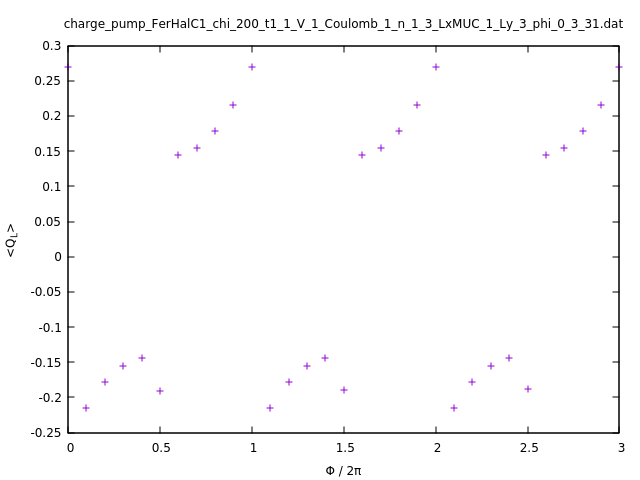

Try it for yourself if you have time:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.plot(data2['phi_ext'], data2['QL'], marker='o')
ax.set_xlabel(r"$\phi / 2 \pi$", fontsize=20)
ax.set_ylabel(r"$\langle Q_L \rangle$", fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.set_xlim([0, 3])
plt.show()

This is clearly not right, so where did we go wrong? The first thing to diagnose is the system size. Since we are working with matrix product state unit cells tiling an infinite cylinder, it is the $L_y$ value that is restricting the system size. We now increase the system size to $L_x\times L_y = 1\times 6$ and re-run.

WARNING: The following cell may take several **hours** to run.

In [ ]:
data3 = dict(phi_ext=np.linspace(0, 3.0, 31), QL=[], ent_spectrum=[])

model_params = dict(conserve='N',
                    Lx=1, Ly=6,
                    t1=-1., mu=0, V=1., phi_ext=0.,
                    bc_MPS='infinite', bc_y='cylinder', verbose=0)

dmrg_params = {
    'mixer': True, # setting this to True helps to escape local minima
    'mixer_params': {'amplitude': 1.e-5, 'decay': 1.2, 'disable_after': 30},
    'trunc_params': {
        # 'chi_max': 200,
        'svd_min': 1.e-10,
    },
    'lanczos_params': {
        # 'reortho': True,
        # 'N_cache': 40
        'cutoff': 1.e-13  # fixes theta=0 error
    },
    'chi_list': {0: 9, 10: 49, 20: 100, 40: 200},
    'max_E_err': 1.e-6,
    'max_S_err': 1.e-6,
    'max_sweeps': 1000,
    'verbose': 1.,
    'N_sweeps_check': 10,  # default=10
    'diag_method': 'default',
    'combine' : True
}

# dmrg_params = {
#     'mixer': True,  # setting this to True helps to escape local minima
#     'mixer_params': {
#         'amplitude': 1.e-5,
#         'decay': 1.2,
#         'disable_after': 30
#     },
#     'trunc_params': {
#         'chi_max': 200,
#         'svd_min': 1.e-10,
#     },
#     'max_E_err': 1.e-8,
#     'max_S_err': 1.e-6,
#     'max_sweeps': 150,
#     'verbose': 1,
#     'combine': True
# }

prod_state = [1,0,0,0,0,0,1,0,0,0,0,0]

eng = None
for phi in np.linspace(0, 3.0, 31):
    print("="*100)
    print("phi_ext = ", phi)
    model_params['phi_ext'] = phi
    if eng is None:  # first time in the loop
        M = FermionicHaldaneModel(model_params)
        psi = MPS.from_product_state(M.lat.mps_sites(), prod_state, bc=M.lat.bc_MPS)
        eng = dmrg.TwoSiteDMRGEngine(psi, M, dmrg_params)
    else:
        del eng.options['chi_list']
        M = FermionicHaldaneModel(model_params)
        eng.init_env(model=M)
    E, psi = eng.run()
    data3['QL'].append(psi.average_charge(bond=0)[0])
    data3['ent_spectrum'].append(psi.entanglement_spectrum(by_charge=True)[0])

This gives us the following charge pumping plot:

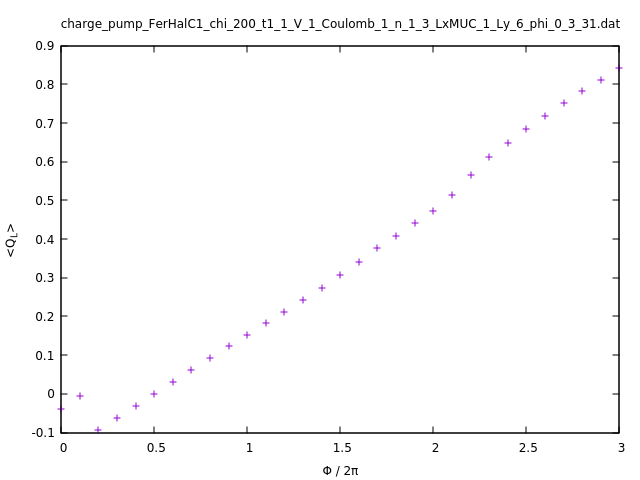

Try it for yourself if you have time:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.plot(data3['phi_ext'], data3['QL'], marker='o')
ax.set_xlabel(r"$\phi / 2 \pi$", fontsize=20)
ax.set_ylabel(r"$\langle Q_L \rangle$", fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.set_xlim([0, 3])
plt.show()

We basically get the expected pumping of 1 charge after 3 flux insertions. There is, however, something funky happening at the beginning that we will fix next.

Note also that sometimes increasing the $L_y$ will break the state. For example, if we increase to $L_y=6$ for the Haldane CI example that we looked at previously, then this will produce rubbish because our bond dimension is only $100$.

The moral of the story is that you need a larger enough $L_y$ to stabilize a state, and also a large enough bond dimension to cope with that $L_y$.

### Does the initial product state make a difference?

The graph that we produced in the previous step looks a bit odd at the beginning. By default the initial product state for that command was: [1,0,0,0,0,0,1,0,0,0,0,0], since we spread out the particles evenly. Sometimes this makes a difference. For example, in the honeycomb lattice we notice that this configuration has two particles both situated on A sites. If we instead set prod_state = [1,0,0,0,0,0,0,0,0,0,0,1] and then run...

WARNING: The following cell may take several **hours** to run.

In [ ]:
data4 = dict(phi_ext=np.linspace(0, 3.0, 31), QL=[], ent_spectrum=[])

model_params = dict(conserve='N',
                    Lx=1, Ly=6,
                    t1=-1., mu=0, V=1., phi_ext=0.,
                    bc_MPS='infinite', bc_y='cylinder', verbose=0)

dmrg_params = {
    'mixer': True, # setting this to True helps to escape local minima
    'mixer_params': {'amplitude': 1.e-5, 'decay': 1.2, 'disable_after': 30},
    'trunc_params': {
        # 'chi_max': 200,
        'svd_min': 1.e-10,
    },
    'lanczos_params': {
        # 'reortho': True,
        # 'N_cache': 40
        'cutoff': 1.e-13  # fixes theta=0 error
    },
    'chi_list': {0: 9, 10: 49, 20: 100, 40: 200},
    'max_E_err': 1.e-6,
    'max_S_err': 1.e-6,
    'max_sweeps': 1000,
    'verbose': 1.,
    'N_sweeps_check': 10,  # default=10
    'diag_method': 'default',
    'combine' : True
}

# dmrg_params = {
#     'mixer': True,  # setting this to True helps to escape local minima
#     'mixer_params': {
#         'amplitude': 1.e-5,
#         'decay': 1.2,
#         'disable_after': 30
#     },
#     'trunc_params': {
#         'chi_max': 200,
#         'svd_min': 1.e-10,
#     },
#     'max_E_err': 1.e-8,
#     'max_S_err': 1.e-6,
#     'max_sweeps': 150,
#     'verbose': 1,
#     'combine': True
# }

prod_state = [1,0,0,0,0,0,0,0,0,0,0,1]

eng = None
for phi in np.linspace(0, 3.0, 31):
    print("="*100)
    print("phi_ext = ", phi)
    model_params['phi_ext'] = phi
    if eng is None:  # first time in the loop
        M = FermionicHaldaneModel(model_params)
        psi = MPS.from_product_state(M.lat.mps_sites(), prod_state, bc=M.lat.bc_MPS)
        eng = dmrg.TwoSiteDMRGEngine(psi, M, dmrg_params)
    else:
        del eng.options['chi_list']
        M = FermionicHaldaneModel(model_params)
        eng.init_env(model=M)
    E, psi = eng.run()
    data4['QL'].append(psi.average_charge(bond=0)[0])
    data4['ent_spectrum'].append(psi.entanglement_spectrum(by_charge=True)[0])

...this fixes the jumping at the beginning and we get a nice smooth line:

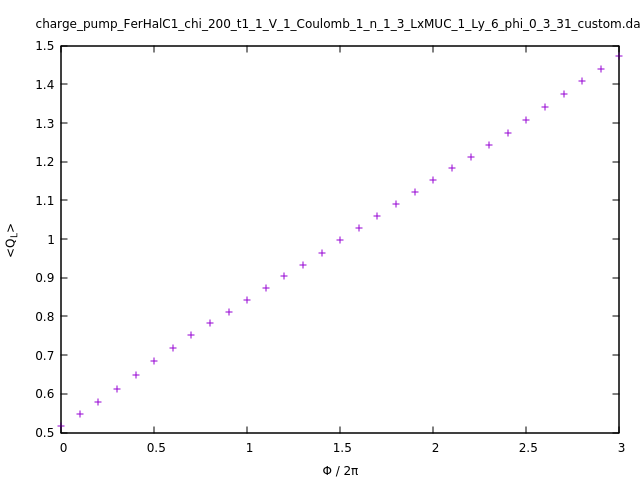

Try it for yourself if you have time:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = plt.gca()
ax.plot(data4['phi_ext'], data4['QL'], marker='o')
ax.set_xlabel(r"$\phi / 2 \pi$", fontsize=20)
ax.set_ylabel(r"$\langle Q_L \rangle$", fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.set_xlim([0, 3])
plt.show()

You can also check the corresponding spectral flow:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = plt.gca()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
color_by_charge = {}
for phi_ext, spectrum in zip(data4['phi_ext'], data4['ent_spectrum']):
    for q, s in spectrum:
        q = q[0]
        label = ""
        if q not in color_by_charge:
            label = "q={q:+d}".format(q=q)
            color_by_charge[q] = colors[len(color_by_charge) % len(colors)]
        color = color_by_charge[q]
        ax.plot(phi_ext*np.ones(s.shape), s,
                linestyle='', marker='x', color=color, label=label)
ax.set_xlabel(r"$\phi / 2 \pi$", fontsize=20)
ax.set_ylabel(r"$ \epsilon_\alpha $", fontsize=20)
ax.set_ylim(0., 8.)
ax.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.4, 1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.set_xlim([0, 3])
plt.show()

### Is the bond dimension large enough?

If you look very carefully at the plot that we just produced, then you may notice that it is still not quite right. We are expecting $1$ charge pumped after $3$ flux insertions, whereas we are only getting $0.95$ charges pumped after $3$ flux insertions. This is because our bond dimension of $\chi=200$ is not accurate enough to perform the pumping to the desired precision. If we were to run with $\chi=500$, then we would get $1.00$ charges pumped after $3$ flux insertions, as expected. You can try it if you have time.

## Figure 3.(a)

Now that we have demonstrated the fermionic Laughlin state in the Haldane model using flux insertion, the next part of the paper is about identifying these states using the entanglement entropy. In the first instance, we plot the entanglement entropy against system size. According to the 'area law' of entanglement, the entropy should scale as $S=\alpha L + \gamma$, where $\alpha$ is a non-universal constant dependent on the microscopic Hamiltonian and $\gamma$ is the topological entanglement entropy. It was shown, simultaneously by [Kitaev-Preskill](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.96.110404) and [Levin-Wen](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.96.110405), that the topological entanglement entropy is given as $\gamma = \log \sqrt{\sum d_i^2}$, where $d_i$ is the quantum dimension of quasipartical $i$. Abelian quasiparticles have a quantum dimension of $1$. Therefore, in the case of the $\nu=1/3$ fermionic Laughlin state, we expect three fractionalized $1/3$ charges and a topological entanglement entropy of $\gamma=\log\sqrt{3}$.

In what follows, we perform the corresponding computation for hardcore bosons to save time.

WARNING: The following cell may take several minutes to run.

In [180]:
from tenpy.models.haldane import BosonicHaldaneModel

data5 = []

model_params1 = dict(conserve='N',
                    Lx=1, Ly=4,
                    t1=-1., mu=0, V=0., phi_ext=0.,
                    bc_MPS='infinite', bc_y='cylinder', verbose=0)

model_params2 = dict(conserve='N',
                    Lx=1, Ly=8,
                    t1=-1., mu=0, V=0., phi_ext=0.,
                    bc_MPS='infinite', bc_y='cylinder', verbose=0)

dmrg_params = {
    'mixer': True, # setting this to True helps to escape local minima
    'mixer_params': {'amplitude': 1.e-5, 'decay': 1.2, 'disable_after': 30},
    'trunc_params': {
        # 'chi_max': 200,
        'svd_min': 1.e-10,
    },
    'lanczos_params': {
        # 'reortho': True,
        # 'N_cache': 40
        'cutoff': 1.e-13  # fixes theta=0 error
    },
    'chi_list': {0: 9, 10: 49, 20: 200, 40: 200},
    'max_E_err': 1.e-6,
    'max_S_err': 1.e-6,
    'max_sweeps': 1000,
    'verbose': 1.,
    'N_sweeps_check': 10,  # default=10
    'diag_method': 'default',
    'combine' : True
}

prod_state1 = [1,0,0,0,1,0,0,0]
prod_state2 = [1,0,0,0,1,0,0,0]*2

eng = None

M1 = BosonicHaldaneModel(model_params1)
psi_in_1 = MPS.from_product_state(M1.lat.mps_sites(), prod_state1, bc=M1.lat.bc_MPS)
eng1 = dmrg.TwoSiteDMRGEngine(psi_in_1, M1, dmrg_params)
E1, psi1 = eng1.run()

M2 = BosonicHaldaneModel(model_params2)
psi_in_2 = MPS.from_product_state(M2.lat.mps_sites(), prod_state2, bc=M2.lat.bc_MPS)
eng2 = dmrg.TwoSiteDMRGEngine(psi_in_2, M2, dmrg_params)
E2, psi2 = eng2.run()

Ly = [4, 8]
SvN = [psi1.entanglement_entropy()[0], psi2.entanglement_entropy()[0]]
Sinf = [psi1.entanglement_entropy(n=np.inf)[0], psi2.entanglement_entropy(n=np.inf)[0]]

data5 = [Ly, SvN, Sinf]

Reading 'combine'=True for config TwoSiteDMRGEngine
Subconfig 'lanczos_params'=Config(<2 options>, 'lanczos_params') for config TwoSiteDMRGEngine
Subconfig 'trunc_params'=Config(<2 options>, 'trunc_params') for config TwoSiteDMRGEngine
Reading 'chi_list'={0: 9, 10: 49, 20: 200, 40: 200} for config TwoSiteDMRGEngine
Setting chi_max = 9
Initial sweeps...
Updating environment
.
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'diag_method'='default' for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Setting chi_max = 49
Updating environment
.....
sweep 10, age = 264
Energy = -0.8738359671163458, S = nan, norm_err = 4.2e-06
Current memory usage 1070.5 MB, time elapsed: 7.0 s
Delta E = nan, Delta 

/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
Updating environment
.....
DMRG finished after 130 sweeps.
total size = 3304, maximum chi = 200
Reading 'combine'=True for config TwoSiteDMRGEngine
Subconfig 'lanczos_params'=Config(<12 options>, 'lanczos_params') for config TwoSiteDMRGEngine
Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config TwoSiteDMRGEngine
Reading 'init_env_data'={} for config TwoSiteDMRGEngine
Reading 'orthogonal_to'=[] for config TwoSiteDMRGEngine
Reading 'sweep_0'=0 for config TwoSiteDMRGEngine
Reading 'chi_list'={0: 9, 10: 49, 20: 200, 40: 200} for config TwoSiteDMRGEngine
Setting chi_max = 9
Initial sweeps...
Reading 'start_env'=1 for config TwoSiteDMRGEngine
Updating environment
.
Reading 'P_tol_to_trunc'=0.05 for config TwoSiteDMRGEngine
Reading 'P_tol_min'=1e-30 for config TwoSiteDMRGEngine
Reading 'P_tol_max'=0.0001 for config TwoSiteDMRGEngine
Reading 'E_tol_to_trunc'=None for config TwoSiteDMRGEngine
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'min_sweeps'=

/home/bart/TeNPy/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


.....
DMRG finished after 60 sweeps.
total size = 3088, maximum chi = 200


We try to reproduce the equivalent of Fig. 3.(a) to verify this below.

SvN=0.07325260541887807L+1.481898301223092
Sinf=0.04080626826257733L+0.9461062073376794


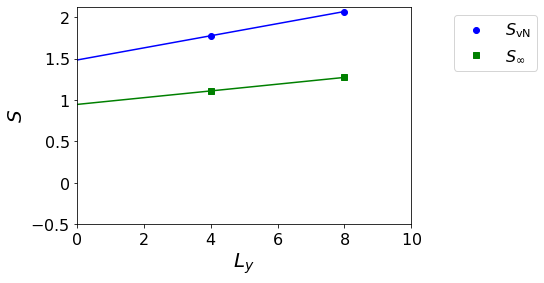

In [181]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.plot(data5[0], data5[1], 'o', c='b', label='$S_\mathrm{vN}$')

# for two points
m = (data5[1][1] - data5[1][0]) / (data5[0][1] - data5[0][0])
b = data5[1][0] - m*data5[0][0]
# for >2 points
# m, b = np.polyfit(data5[0], data5[1], 1)

print(f"SvN={m}L+{b}")
x = np.array([0, data5[0][-1]])
ax.plot(x, m*x + b, c='b')
ax.plot(data5[0], data5[2], 's', c='g', label='$S_\infty$')

# for two points
m = (data5[2][1] - data5[2][0]) / (data5[0][1] - data5[0][0])
b = data5[2][0] - m*data5[0][0]
# for >2 points
# m, b = np.polyfit(data5[0], data5[2], 1)

print(f"Sinf={m}L+{b}")
x = np.array([0, data5[0][-1]])
ax.plot(x, m*x + b, c='g')
ax.set_xlabel(r"$L_y$", fontsize=20)
ax.set_ylabel(r"$S$", fontsize=20)
ax.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.4, 1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.set_xlim([0, 10])
ax.set_ylim(-0.5)
plt.show()

What should the topological entanglement entropy be for the bosonic Laughlin state? Does this agree with that value? Can you tune the algorithm parameters so that it does agree? See the paper by [Andrews, Mohan, and Neupert](https://arxiv.org/abs/2007.08870) for further notes on accurately computing the topological entanglement entropy.

If you have time, you can try it for the fermionic Laughlin state to reproduce Fig. 3.(a).

## Figure 3.(b)

The next method of identifying a fractional Chern insulator from entanglement is to examine the edge states of the momentum-resolved entanglement spectrum. When we plot the momentum-resolved entanglement spectrum, as described in the text, we notice a branch of low-lying edge states separated from the bulk. The quasi-degeneracy, or counting, of these edge states is related to the fractional quantum Hall wavefunction and hence can tell us about the nature of the state. Since the degeneracy of edge states will be the number of symmetric polynomials of a particular rank forming the Jastrow factor of our fractional quantum Hall wavefunction, the edge state counting for a $U(1)$ theory (such as the fermionic Laughlin state) is simply given by the partition function from number theory, as explained by [Wen](https://www.semanticscholar.org/paper/THEORY-OF-THE-EDGE-STATES-IN-FRACTIONAL-QUANTUM-Wen/ccfd6b4663974bece550ca8c6eb2b2f84b62241d?p2df).

In the interests of time, we run the simulation for an interacting version of the Chern insulator example from the beginning of this section. You can also try it for the fractional Chern insulator to reproduce Fig. 3.(b) if you have time.

WARNING: The following cell may take several minutes to run.

In [ ]:
data6 = []

model_params = dict(conserve='N',
                    Lx=1, Ly=6,
                    t1=-1., mu=0, V=1., phi_ext=0.,
                    bc_MPS='infinite', bc_y='cylinder', verbose=0)

dmrg_params = {
    'mixer': True, # setting this to True helps to escape local minima
    'mixer_params': {'amplitude': 1.e-5, 'decay': 1.2, 'disable_after': 30},
    'trunc_params': {
        # 'chi_max': 200,
        'svd_min': 1.e-10,
    },
    'lanczos_params': {
        # 'reortho': True,
        # 'N_cache': 40
        'cutoff': 1.e-13  # fixes theta=0 error
    },
    'chi_list': {0: 9, 10: 49, 20: 100, 40: 400},
    'max_E_err': 1.e-6,
    'max_S_err': 1.e-6,
    'max_sweeps': 1000,
    'verbose': 1.,
    'N_sweeps_check': 10,  # default=10
    'diag_method': 'default',
    'combine' : True
}

prod_state = [1,0,1,0,1,0,1,0,1,0,1,0]

eng = None

M = FermionicHaldaneModel(model_params)
psi = MPS.from_product_state(M.lat.mps_sites(), prod_state, bc=M.lat.bc_MPS)
eng = dmrg.TwoSiteDMRGEngine(psi, M, dmrg_params)
E, psi = eng.run()

(Un, W, q, ov, trunc_err) = psi.compute_K(perm=M.lat, trunc_par={'chi_max': 400}, canonicalize=1.e-6, verbose=0)

for i in range(len(W)):
    qval=q.to_qflat()[i][0] 
    K=np.angle(W[i])/np.pi 
    epsilon=-np.log(np.abs(W[i]))
    
    data6.append([K, epsilon, qval])

We can then plot the entanglement spectrum at the zeroth bond, resolved by momentum eigenvalues corresponding to translational invariance around the cylinder.

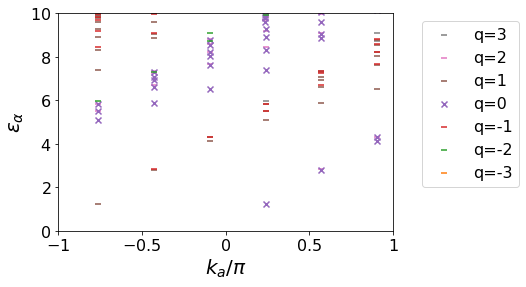

In [144]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
    
x = []
y = []
z = []    

for row in data6:
    x.append(float(row[0]))
    y.append(float(row[1]))
    z.append(int(row[2]))

for value in np.linspace(3, -3, 7, dtype=int):
    xvalue = []
    yvalue = []
    for i in range(len(x)):
        if z[i] == value:
            xvalue.append(x[i])
            yvalue.append(y[i])
    if value != 0:
        ax.scatter(xvalue, yvalue, marker='_', c='C{}'.format((value + 4) % 10), label='q={}'.format(value))
    else:
        ax.scatter(xvalue, yvalue, marker='x', c='C{}'.format((value + 4) % 10), label='q={}'.format(value))

ax.set_xlabel(r"$k_a / \pi$", fontsize=20)
ax.set_ylabel(r"$\epsilon_\alpha$", fontsize=20)
ax.set_xlim(-1, 1)
ax.set_ylim(0., 10.)
ax.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.4, 1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
plt.xticks(np.arange(-1, 1.1, 0.5))
plt.show()

The states in the zeroth charge sector are drawn with crosses for clarity. Here you can see the expected counting of edge states: $1, 1, 2, 3, 5, 7, 11, ...$.

## Figure 3.(c)

The final part of the paper deals with the breakdown transition. Since we mentioned in the previous sections that we chose $V_1$ such that $\Delta \ll V_1$, the natural question to ask is: what happens if we vary $V_1$? Specifically, for what values of $V_1$ do we obtain a metallic phase and for what values a fractional Chern insulator?

As before, we could compute the ground-state wavefunction for different $V_1$ and measure the entanglement enegry at bond zero and/or correlation length to find the critical $V_1$ for the metal-to-FCI transition in our fermionic Laughlin state. However, this may take several days to run. Instead, we produce analogous plots for the CI-to-metal transition for the integer Chern insulator that we studied at the beginning of this tutorial. You can then change the parameters to reproduce Fig. 3.(c) if you have time.

WARNING: The following cell may take several minutes to run.

In [70]:
data7 = dict(V_ext=np.linspace(0, 10.0, 41), corr_len=[], ent_spectrum=[])

model_params = dict(conserve='N',
                    Lx=1, Ly=3,
                    t1=-1., mu=0, V=0., phi_ext=0.,
                    bc_MPS='infinite', bc_y='cylinder', verbose=0)

dmrg_params = {
    'mixer': True, # setting this to True helps to escape local minima
    'mixer_params': {'amplitude': 1.e-5, 'decay': 1.2, 'disable_after': 30},
    'trunc_params': {
        'chi_max': 100,
        'svd_min': 1.e-10,
    },
    'chi_list': {0: 9, 10: 49, 20: 100},
    'max_E_err': 1.e-10,
    'max_S_err': 1.e-6,
    'max_sweeps': 150,
    'verbose': 1.,
    'combine': True
}

prod_state = [1,0,1,0,1,0]

eng = None
for V_ext in np.linspace(0, 10.0, 41):
    print("="*100)
    print("V_ext = ", V_ext)
    model_params['V'] = V_ext
    if eng is None:  # first time in the loop
        M = FermionicHaldaneModel(model_params)
        psi = MPS.from_product_state(M.lat.mps_sites(), prod_state, bc=M.lat.bc_MPS)
        eng = dmrg.TwoSiteDMRGEngine(psi, M, dmrg_params)
    else:
        del eng.options['chi_list']
        M = FermionicHaldaneModel(model_params)
        eng.init_env(model=M)
    E, psi = eng.run()
    data7['corr_len'].append(psi.correlation_length())
    data7['ent_spectrum'].append(psi.entanglement_spectrum(by_charge=True)[0])

V_ext =  0.0
Reading 'combine'=True for config TwoSiteDMRGEngine
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Reading 'chi_list'={0: 9, 10: 49, 20: 100} for config TwoSiteDMRGEngine
Setting chi_max = 9
Initial sweeps...
Updating environment
.
Reading 'max_sweeps'=150 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-10 for config TwoSiteDMRGEngine
Reading 'max_S_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Setting chi_max = 49
Updating environment
.....
sweep 10, age = 198
Energy = -0.8235335100808877, S = nan, norm_err = 2.9e-08
Current memory usage 188.3 MB, time elapsed: 4.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5121e-02, max_E_trunc = 4.4430e-02
MPS bond dimensions: [49, 49, 19, 49, 49, 44]
Setting chi_max = 100
Updating environment
.....
sweep 20, age = 378
Energy = -0.848

/home/bart/TeNPy/tenpy/algorithms/mps_sweeps.py:196: UserWarning: The leg of the new model is incompatible with the previous one.Rebuild environment from scratch.
  warnings.warn("The leg of the new model is incompatible with the previous one."


.
Updating environment
.....
sweep 10, age = 198
Energy = -0.7790889902370234, S = nan, norm_err = 6.9e-05
Current memory usage 188.3 MB, time elapsed: 11.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.6666e-07, max_E_trunc = 2.1894e-06
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
Updating environment
.....
sweep 20, age = 378
Energy = -0.7790907011821323, S = nan, norm_err = 6.2e-08
Current memory usage 188.3 MB, time elapsed: 20.4 s
Delta E = -1.7109e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1598e-07, max_E_trunc = 5.0608e-07
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
disable mixer after 30 sweeps, final amplitude 4.21e-08
Updating environment
.....
sweep 30, age = 558
Energy = -0.7790908604998729, S = 1.3850552627766188, norm_err = 4.6e-10
Current memory usage 188.3 MB, time elapsed: 27.7 s
Delta E = -1.5932e-08, Delta S = nan (per sweep)
max_trunc_err = 9.7131e-08, max_E_trunc = 4.4907e-07
MPS bond dimensions: [99, 100, 100, 100,

DMRG finished after 40 sweeps.
total size = 3114, maximum chi = 100
V_ext =  1.25
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 3306
Energy = -0.5160986780546940, S = nan, norm_err = 6.6e-07
Current memory usage 188.3 MB, time elapsed: 9.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5990e-06, max_E_trunc = 8.3521e-06
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
Updating environment
.....
sweep 20, age = 3486
Energy = -0.5161013966434590, S = nan, norm_err = 1.5e-07
Current memory usage 188.3 MB, time elapsed: 17.0 s
Delta E = -2.7186e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3120e-06, max_E_trunc = 7.0351e-06
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
disable mixer after 30 sweeps, final amplitude 4.21e-08
Updating environment
.....
sweep 30, age = 3666
Energy = -0.5161017306884711, S = 1.4423525620060305, norm_err = 5.5e-09
Current memory usage 188.3 MB, time elapsed: 23.7 s
Delta E = -3.3405e-

Updating environment
.....
sweep 50, age = 6222
Energy = -0.3424083262626330, S = 1.1798535025272983, norm_err = 1.1e-06
Current memory usage 188.3 MB, time elapsed: 33.8 s
Delta E = 2.1732e-09, Delta S = -9.3337e-06 (per sweep)
max_trunc_err = 2.6259e-06, max_E_trunc = 3.2229e-05
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
Updating environment
.....
sweep 60, age = 6402
Energy = -0.3424083263910613, S = 1.1798451639460394, norm_err = 1.1e-06
Current memory usage 188.3 MB, time elapsed: 38.4 s
Delta E = -1.2843e-11, Delta S = -8.3386e-07 (per sweep)
max_trunc_err = 2.6257e-06, max_E_trunc = 3.2227e-05
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
DMRG finished after 60 sweeps.
total size = 6402, maximum chi = 100
V_ext =  2.25
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 6594
Energy = -0.3081591530898322, S = nan, norm_err = 6.2e-07
Current memory usage 188.3 MB, time elapsed: 8.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max

.....
sweep 20, age = 9150
Energy = -0.2377918800879494, S = nan, norm_err = 4.6e-08
Current memory usage 188.3 MB, time elapsed: 17.2 s
Delta E = -8.5355e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9501e-08, max_E_trunc = 2.8738e-07
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
disable mixer after 30 sweeps, final amplitude 4.21e-08
Updating environment
.....
sweep 30, age = 9330
Energy = -0.2377919985364466, S = 0.5076355607919504, norm_err = 5.5e-12
Current memory usage 188.3 MB, time elapsed: 24.4 s
Delta E = -1.1845e-08, Delta S = nan (per sweep)
max_trunc_err = 2.4043e-08, max_E_trunc = 2.3375e-07
MPS bond dimensions: [99, 100, 100, 100, 100, 100]
Updating environment
.....
sweep 40, age = 9510
Energy = -0.2377920011654927, S = 0.5076356898200436, norm_err = 3.6e-12
Current memory usage 188.3 MB, time elapsed: 28.9 s
Delta E = -2.6290e-10, Delta S = 1.2903e-08 (per sweep)
max_trunc_err = 1.1053e-08, max_E_trunc = 2.1147e-07
MPS bond dimensions: [100, 100, 100, 1

Updating environment
.....
sweep 40, age = 12246
Energy = -0.1932881638455607, S = 0.3561920167514729, norm_err = 7.2e-14
Current memory usage 188.3 MB, time elapsed: 28.8 s
Delta E = -6.4156e-10, Delta S = 2.9927e-09 (per sweep)
max_trunc_err = 1.1419e-09, max_E_trunc = 2.7356e-08
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
Updating environment
.....
sweep 50, age = 12426
Energy = -0.1932881638371479, S = 0.3561920275954986, norm_err = 8.9e-14
Current memory usage 188.3 MB, time elapsed: 33.4 s
Delta E = 8.4128e-13, Delta S = 1.0844e-09 (per sweep)
max_trunc_err = 1.1465e-09, max_E_trunc = 2.7498e-08
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
DMRG finished after 50 sweeps.
total size = 12426, maximum chi = 100
V_ext =  4.0
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 12618
Energy = -0.1818770904155068, S = nan, norm_err = 2.5e-08
Current memory usage 188.3 MB, time elapsed: 9.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
ma

.
Updating environment
.....
sweep 10, age = 15174
Energy = -0.1544129327041901, S = nan, norm_err = 9.7e-09
Current memory usage 188.3 MB, time elapsed: 9.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.1954e-10, max_E_trunc = 1.1797e-08
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
Updating environment
.....
sweep 20, age = 15354
Energy = -0.1544129577182503, S = nan, norm_err = 5.0e-09
Current memory usage 188.3 MB, time elapsed: 17.8 s
Delta E = -2.5014e-09, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.8174e-10, max_E_trunc = 7.9599e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
disable mixer after 30 sweeps, final amplitude 4.21e-08
Updating environment
.....
sweep 30, age = 15534
Energy = -0.1544129646245741, S = 0.2447609979831413, norm_err = 1.3e-14
Current memory usage 188.3 MB, time elapsed: 24.8 s
Delta E = -6.9063e-10, Delta S = nan (per sweep)
max_trunc_err = 3.2083e-10, max_E_trunc = 5.2414e-09
MPS bond dimensions: [98, 99, 99, 1

.
Updating environment
.....
sweep 10, age = 18102
Energy = -0.1284122456893328, S = nan, norm_err = 4.8e-09
Current memory usage 188.3 MB, time elapsed: 8.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1919e-10, max_E_trunc = 3.5370e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
Updating environment
.....
sweep 20, age = 18282
Energy = -0.1284122515742183, S = nan, norm_err = 1.7e-09
Current memory usage 188.3 MB, time elapsed: 17.0 s
Delta E = -5.8849e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8995e-11, max_E_trunc = 1.7890e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
disable mixer after 30 sweeps, final amplitude 4.21e-08
Updating environment
.....
sweep 30, age = 18462
Energy = -0.1284122533802474, S = 0.1800353800523833, norm_err = 2.2e-15
Current memory usage 188.3 MB, time elapsed: 24.9 s
Delta E = -1.8060e-10, Delta S = nan (per sweep)
max_trunc_err = 6.0166e-11, max_E_trunc = 1.1005e-09
MPS bond dimensions: [97, 97, 98, 1

.
Updating environment
.....
sweep 10, age = 21030
Energy = -0.1098375219545839, S = nan, norm_err = 2.3e-09
Current memory usage 188.3 MB, time elapsed: 9.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.6828e-11, max_E_trunc = 1.1205e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100]
Updating environment
.....
sweep 20, age = 21210
Energy = -0.1098375232937390, S = nan, norm_err = 7.9e-10
Current memory usage 188.3 MB, time elapsed: 17.2 s
Delta E = -1.3392e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8696e-11, max_E_trunc = 5.9936e-10
MPS bond dimensions: [100, 100, 99, 100, 100, 100]
disable mixer after 30 sweeps, final amplitude 4.21e-08
Updating environment
.....
sweep 30, age = 21390
Energy = -0.1098375238801357, S = 0.1386593664816094, norm_err = 3.1e-15
Current memory usage 188.3 MB, time elapsed: 24.1 s
Delta E = -5.8640e-11, Delta S = nan (per sweep)
max_trunc_err = 1.5507e-11, max_E_trunc = 3.5743e-10
MPS bond dimensions: [97, 97, 99, 10

.
Updating environment
.....
sweep 10, age = 23958
Energy = -0.0959224138046011, S = nan, norm_err = 1.1e-09
Current memory usage 188.3 MB, time elapsed: 9.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4920e-11, max_E_trunc = 4.4565e-10
MPS bond dimensions: [100, 100, 98, 100, 100, 100]
Updating environment
.....
sweep 20, age = 24138
Energy = -0.0959224141958354, S = nan, norm_err = 3.9e-10
Current memory usage 188.3 MB, time elapsed: 17.4 s
Delta E = -3.9123e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0007e-11, max_E_trunc = 2.3374e-10
MPS bond dimensions: [100, 100, 99, 100, 100, 100]
disable mixer after 30 sweeps, final amplitude 4.21e-08
Updating environment
.....
sweep 30, age = 24318
Energy = -0.0959224144406410, S = 0.1104450056964669, norm_err = 1.1e-15
Current memory usage 188.3 MB, time elapsed: 24.2 s
Delta E = -2.4481e-11, Delta S = nan (per sweep)
max_trunc_err = 4.9599e-12, max_E_trunc = 1.3097e-10
MPS bond dimensions: [97, 96, 99, 100

.
Updating environment
.....
sweep 10, age = 26886
Energy = -0.0851174349741844, S = nan, norm_err = 7.5e-10
Current memory usage 188.3 MB, time elapsed: 8.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0895e-11, max_E_trunc = 1.8917e-10
MPS bond dimensions: [100, 100, 98, 100, 100, 100]
Updating environment
.....
sweep 20, age = 27066
Energy = -0.0851174351647235, S = nan, norm_err = 2.7e-10
Current memory usage 188.3 MB, time elapsed: 17.1 s
Delta E = -1.9054e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0020e-12, max_E_trunc = 1.0823e-10
MPS bond dimensions: [100, 100, 98, 100, 100, 100]
disable mixer after 30 sweeps, final amplitude 4.21e-08
Updating environment
.....
sweep 30, age = 27246
Energy = -0.0851174352800020, S = 0.0902707446281752, norm_err = 3.0e-15
Current memory usage 188.3 MB, time elapsed: 23.9 s
Delta E = -1.1528e-11, Delta S = nan (per sweep)
max_trunc_err = 1.8995e-12, max_E_trunc = 7.1850e-11
MPS bond dimensions: [97, 96, 99, 100

.
Updating environment
.....
sweep 10, age = 29814
Energy = -0.0764890620610762, S = nan, norm_err = 4.6e-10
Current memory usage 188.3 MB, time elapsed: 9.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3518e-12, max_E_trunc = 1.1096e-10
MPS bond dimensions: [100, 100, 93, 100, 100, 100]
Updating environment
.....
sweep 20, age = 29994
Energy = -0.0764890621492214, S = nan, norm_err = 1.5e-10
Current memory usage 188.3 MB, time elapsed: 17.2 s
Delta E = -8.8145e-12, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7903e-12, max_E_trunc = 4.8203e-11
MPS bond dimensions: [100, 100, 93, 100, 100, 100]
disable mixer after 30 sweeps, final amplitude 4.21e-08
Updating environment
.....
sweep 30, age = 30174
Energy = -0.0764890622037152, S = 0.0753071434891340, norm_err = 2.1e-15
Current memory usage 188.3 MB, time elapsed: 24.0 s
Delta E = -5.4494e-12, Delta S = nan (per sweep)
max_trunc_err = 8.0933e-13, max_E_trunc = 2.9104e-11
MPS bond dimensions: [97, 95, 98, 100

We can then plot the correlation length, $\xi$, and entanglement energies, $\epsilon_\alpha$, against $V_1$.

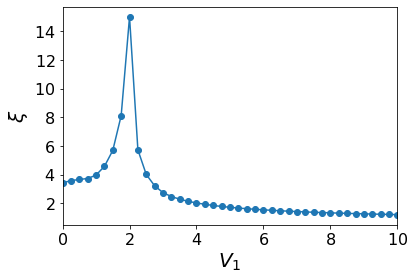

In [71]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.plot(data7['V_ext'], data7['corr_len'], marker='o')
ax.set_xlabel(r"$V_1$", fontsize=20)
ax.set_ylabel(r"$ \xi $", fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.set_xlim([0, 10])
plt.show()

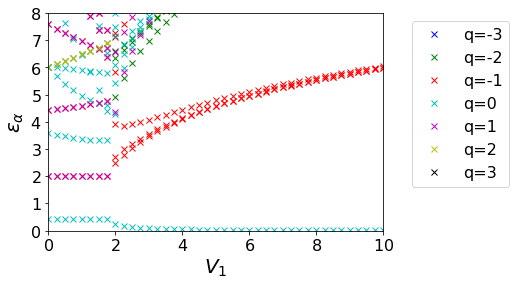

In [146]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
color_by_charge = {}
for V_ext, spectrum in zip(data7['V_ext'], data7['ent_spectrum']):
    for q, s in spectrum:
        q = q[0]
        label = ""
        if q not in color_by_charge:
            label = "q={q:d}".format(q=q)
            color_by_charge[q] = colors[len(color_by_charge) % len(colors)]
        color = color_by_charge[q]
        ax.plot(V_ext*np.ones(s.shape), s,
                linestyle='', marker='x', color=color, label=label)
ax.set_xlabel(r"$V_1$", fontsize=20)
ax.set_ylabel(r"$ \epsilon_\alpha $", fontsize=20)
ax.set_ylim(0., 8.)
ax.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.4, 1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.set_xlim([0, 10])
plt.show()

We can see from the plots that the correlation length diverges at a value of $V=2$, which signals a phase transition. This is also reflected in the entanglement spectrum.

## Extension: Stability, phase transitions, and numerical breakdown of fractional Chern insulators in higher Chern bands of the Hofstadter model

This extension produces some of the tensor network results from the paper: ["Stability, phase transitions, and numerical breakdown of fractional Chern insulators in higher Chern bands of the Hofstadter model" by Bartholomew Andrews, Titus Neupert, Gunnar Möller, Physical Review B 104, 125107 (2021)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.104.125107), freely available at [arXiv:2107.06047 [cond-mat.str-el]](https://arxiv.org/abs/2107.06047).

In the previous section, we reviewed the various methods that we can use to identify fractional Chern insulators and focussed on fermions in the Haldane model. In this section, we will look at the simpler and faster case of the Hofstadter model (also implemented in tenpy).

We consider the conventional square-lattice Hofstadter model of the form:

$$ H=t_1\sum_{\langle ij \rangle} e^{i\theta_{ij}} c_i^{\dagger} c_j + V_1 \sum_{\langle ij \rangle} n_i n_j, $$

where $t_1$ is the hopping strength that we set equal to one and $\theta_{ij}$ is the Peierls phase. We take a nearest-neighbor density-density interaction for fermions with $V=10$ and simply a hardcore contact interaction for bosons. The Hofstadter model is analogous to the Haldane model in many ways. For example, it is a tight-binding model that produces topological bands due to a complex phase factor in the hoppings. Unlike in the Haldane model, which has two bands, the Hofstadter model can have a varying number of bands $q$, dictated by the flux density $n_\phi=p/q$, where $p,q$ are coprime integers.

In fact, in the Hofstadter model we also have the flexibility of choosing the Chern number of bands by appropriately selecting the flux density, as discussed in [Möller and Cooper](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.115.126401). Once we have a topological flat band of a given Chern number, we can fractionally fill it according the filling factor

$$ \nu=\frac{r}{kCr+1}, $$

where $r\in\mathbb{Z}$ correponds to the number of filled composite fermion bands, $k\in\mathbb{Z}$ is the number of flux attached per vortex (i.e. $1$ for bosons, $2$ for fermions), and $C$ is the Chern number of the band.

Fortunately, due to the simplicity of the square lattice, we can find evidence of fractional Chern insulators much faster than for the Haldane model above. We start with the charge pumping for the bosonic Laughlin state at $\nu=1/2$ filling. For this simulation, we can achieve the desired result with just $\chi=50$.

WARNING: The following cell may take several minuted to run.

In [44]:
import numpy as np
import random

from tenpy.algorithms import dmrg
from tenpy.networks.mps import MPS
from tenpy.models.hofstadter import HofstadterBosons

data8 = dict(phi_ext=np.linspace(0, 2.0, 21), QL=[])

model_params = dict(Lx=4, Ly=4,
                    # mx=,2 my=1,
                    filling=(1, 8), phi=(1, 4),
                    Jx=1, Jy=1, mu=0, U=0, Nmax=1,
                    bc_MPS='infinite', bc_x='periodic', bc_y='cylinder',
                    conserve='N', order='default', gauge='landau_x')

dmrg_params = {
    'mixer': True,  # setting this to True helps to escape local minima
    'mixer_params': {
        'amplitude': 1.e-5,
        'decay': 1.2,
        'disable_after': 30
    },
    'trunc_params': {
        'chi_max': 50,
        'svd_min': 1.e-10,
    },
    'max_E_err': 1.e-8,
    'max_S_err': 1.e-6,
    'max_sweeps': 150,
    'verbose': 1,
    'combine': True
}

# prod_state = [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
L = model_params['Lx'] * model_params['Ly']
fill = model_params['filling'][0] / model_params['filling'][1]
prod_state = np.zeros(L, dtype=int)
prod_state[random.sample(range(L), int(fill*L))] = 1
print(prod_state)

eng = None
QLs = []
for phi in np.linspace(0, 2.0, 21):

    model_params['phi_ext'] = phi *2 * np.pi
    M = HofstadterBosons(model_params)

    if eng is None:  # first time in the loop
        psi = MPS.from_product_state(M.lat.mps_sites(), prod_state, bc=M.lat.bc_MPS)
        eng = dmrg.TwoSiteDMRGEngine(psi, M, dmrg_params)
    else:
        dmrg_params['mixer'] = False
        eng.init_env(model=M)  # re-initialize

    E, psi = eng.run()

    QL = psi.average_charge(bond=0)[0]
    data8['QL'].append(QL)

[0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
Reading 'bc_MPS'='infinite' for config HofstadterBosons
Reading 'order'='default' for config HofstadterBosons
Reading 'Nmax'=1 for config HofstadterBosons
Reading 'conserve'='N' for config HofstadterBosons
Reading 'filling'=(1, 8) for config HofstadterBosons
Reading 'Lx'=4 for config HofstadterBosons
Reading 'Ly'=4 for config HofstadterBosons
Reading 'bc_x'='periodic' for config HofstadterBosons
Reading 'bc_y'='cylinder' for config HofstadterBosons
Reading 'phi_ext'=0.0 for config HofstadterBosons
Reading 'mu'=0 for config HofstadterBosons
Reading 'U'=0 for config HofstadterBosons
Reading 'gauge'='landau_x' for config HofstadterBosons
Reading 'Jx'=1 for config HofstadterBosons
Reading 'Jy'=1 for config HofstadterBosons
Reading 'phi'=(1, 4) for config HofstadterBosons
Reading 'combine'=True for config TwoSiteDMRGEngine
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Updating environment
.
Readi

/home/bart/TeNPy/tenpy/algorithms/dmrg.py:1997: UserWarning: H is zero in the given block, nothing to diagonalize.We just return the initial state again.
  warnings.warn("H is zero in the given block, nothing to diagonalize."


Updating environment
.....
sweep 10, age = 528
Energy = -0.3467306354959510, S = nan, norm_err = 1.5e-07
Current memory usage 170.4 MB, time elapsed: 20.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5887e-07, max_E_trunc = 4.6380e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 1008
Energy = -0.3467309912409391, S = nan, norm_err = 7.4e-08
Current memory usage 170.4 MB, time elapsed: 32.2 s
Delta E = -3.5574e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.0534e-08, max_E_trunc = 3.0463e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
disable mixer after 30 sweeps, final amplitude 4.21e-08
Updating environment
.....
sweep 30, age = 1488
Energy = -0.3467311516987586, S = 0.6604027760693221, norm_err = 7.3e-14
Current memory usage 170.4 MB, time elapsed: 42.8 s
Delta E = -1.6046e-08, Delta S = nan (per sweep)
max_trunc_err = 7.1795e-0

DMRG finished after 20 sweeps.
total size = 4944, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterBosons
Reading 'bc_MPS'='infinite' for config HofstadterBosons
Reading 'order'='default' for config HofstadterBosons
Reading 'Nmax'=1 for config HofstadterBosons
Reading 'conserve'='N' for config HofstadterBosons
Reading 'filling'=(1, 8) for config HofstadterBosons
Reading 'Lx'=4 for config HofstadterBosons
Reading 'Ly'=4 for config HofstadterBosons
Reading 'bc_x'='periodic' for config HofstadterBosons
Reading 'bc_y'='cylinder' for config HofstadterBosons
Reading 'phi_ext'=2.5132741228718345 for config HofstadterBosons
Reading 'mu'=0 for config HofstadterBosons
Reading 'U'=0 for config HofstadterBosons
Reading 'gauge'='landau_x' for config HofstadterBosons
Reading 'mx'=None for config HofstadterBosons
Reading 'my'=None for config HofstadterBosons
Reading 'Jx'=1 for config HofstadterBosons
Reading 'Jy'=1 for config HofstadterBosons
Reading 'phi'=(1, 4) for config Hofs

.....
sweep 20, age = 8912
Energy = -0.3388796491053512, S = 0.7642647204239466, norm_err = 2.5e-13
Current memory usage 170.4 MB, time elapsed: 15.6 s
Delta E = 1.7478e-11, Delta S = 5.0952e-08 (per sweep)
max_trunc_err = 1.0787e-07, max_E_trunc = 7.2728e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 8912, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterBosons
Reading 'bc_MPS'='infinite' for config HofstadterBosons
Reading 'order'='default' for config HofstadterBosons
Reading 'Nmax'=1 for config HofstadterBosons
Reading 'conserve'='N' for config HofstadterBosons
Reading 'filling'=(1, 8) for config HofstadterBosons
Reading 'Lx'=4 for config HofstadterBosons
Reading 'Ly'=4 for config HofstadterBosons
Reading 'bc_x'='periodic' for config HofstadterBosons
Reading 'bc_y'='cylinder' for config HofstadterBosons
Reading 'phi_ext'=5.026548245743669 for config HofstadterBosons
Reading '

.....
sweep 10, age = 12400
Energy = -0.3456201751503158, S = 0.6730675312546128, norm_err = 5.6e-14
Current memory usage 170.4 MB, time elapsed: 9.0 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 4.2050e-08, max_E_trunc = 2.9147e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 12880
Energy = -0.3456201752163111, S = 0.6730675474329786, norm_err = 5.3e-14
Current memory usage 170.4 MB, time elapsed: 16.5 s
Delta E = -6.5995e-12, Delta S = 1.6178e-09 (per sweep)
max_trunc_err = 4.1581e-08, max_E_trunc = 2.8994e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 12880, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterBosons
Reading 'bc_MPS'='infinite' for config HofstadterBosons
Reading 'order'='default' for config HofstadterBosons
Reading 'Nmax'=1 for config HofstadterBosons
Reading 'conser

Reading 'sort_mpo_legs'=False for config HofstadterBosons
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 16368
Energy = -0.3345528823200539, S = 0.8379725636755718, norm_err = 2.4e-12
Current memory usage 170.4 MB, time elapsed: 9.1 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.8050e-07, max_E_trunc = 1.1614e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 16848
Energy = -0.3345528827677811, S = 0.8379736063859934, norm_err = 2.3e-12
Current memory usage 170.4 MB, time elapsed: 16.6 s
Delta E = -4.4773e-11, Delta S = 1.0427e-07 (per sweep)
max_trunc_err = 1.8111e-07, max_E_trunc = 1.1613e-06
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 16848, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterBosons
Reading 'bc_MPS'='infinite' for config HofstadterB

Reading 'sort_mpo_legs'=False for config HofstadterBosons
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 20336
Energy = -0.3456201799980931, S = 0.6730714970420486, norm_err = 1.3e-13
Current memory usage 170.4 MB, time elapsed: 8.7 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 4.2089e-08, max_E_trunc = 3.0334e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 20816
Energy = -0.3456201799577627, S = 0.6730721415816259, norm_err = 1.3e-13
Current memory usage 170.4 MB, time elapsed: 15.9 s
Delta E = 4.0330e-12, Delta S = 6.4454e-08 (per sweep)
max_trunc_err = 4.2210e-08, max_E_trunc = 3.0405e-07
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 20 sweeps.
total size = 20816, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterBosons
Reading 'bc_MPS'='infinite' for config HofstadterBo

Then we can plot the charge pumping to find $1$ charge pumped after $2$ flux insertions, which corresponds to Hall conductivity of $\sigma_H = e/h C \nu = e/2h$. Due to the lower Hilbert space dimension, running the density matrix renormalization group simulation for bosons is significantly faster than for fermions.

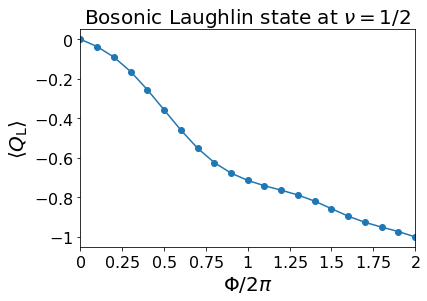

In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.plot(data8['phi_ext'], data8['QL']-data8['QL'][0], marker='o')
ax.set_xlabel(r"$\Phi / 2 \pi$", fontsize=20)
ax.set_ylabel(r"$ \langle Q_\mathrm{L} \rangle $", fontsize=20)
ax.set_title(r"Bosonic Laughlin state at $\nu=1/2$", fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.set_xlim([0, 2])
plt.show()

We can now try the same computation but for fermions with nearest-neighbor interactions and $V=10$. Just like for the Haldane model, we fill a $C=1$ band up to $\nu=1/3$. We use a bond dimension of $\chi=50$.

WARNING: The following cell may take several minutes to run.

In [50]:
import numpy as np

from tenpy.algorithms import dmrg
from tenpy.networks.mps import MPS
from tenpy.models.hofstadter import HofstadterFermions

data9 = dict(phi_ext=np.linspace(0, 3.0, 21), QL=[])

model_params = dict(Lx=3, Ly=6,
                    mx=3, my=1,
                    filling=(1, 9), phi=(1, 3),
                    Jx=1, Jy=1, mu=0, v=10,
                    bc_MPS='infinite', bc_x='periodic', bc_y='cylinder',
                    conserve='N', order='default', gauge='landau_x')

dmrg_params = {
    'mixer': True,  # setting this to True helps to escape local minima
    'mixer_params': {
        'amplitude': 1.e-5,
        'decay': 1.2,
        'disable_after': 30
    },
    'trunc_params': {
        'chi_max': 50,
        'svd_min': 1.e-10,
    },
    'max_E_err': 1.e-8,
    'max_S_err': 1.e-6,
    'max_sweeps': 150,
    'verbose': 1,
    'combine': True
}

prod_state = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

eng = None
QLs = []
for phi in np.linspace(0, 3.0, 21):

    model_params['phi_ext'] = phi * 2 * np.pi

    if eng is None:  # first time in the loop
        M = HofstadterFermions(model_params)
        psi = MPS.from_product_state(M.lat.mps_sites(), prod_state, bc=M.lat.bc_MPS)
        eng = dmrg.TwoSiteDMRGEngine(psi, M, dmrg_params)
    else:
        dmrg_params['mixer'] = False
        M = HofstadterFermions(model_params)
        eng.init_env(model=M)

    E, psi = eng.run()

    QL = psi.average_charge(bond=0)[0]
    data9['QL'].append(QL)

Reading 'bc_MPS'='infinite' for config HofstadterFermions
Reading 'order'='default' for config HofstadterFermions
Reading 'conserve'='N' for config HofstadterFermions
Reading 'filling'=(1, 9) for config HofstadterFermions
Reading 'Lx'=3 for config HofstadterFermions
Reading 'Ly'=6 for config HofstadterFermions
Reading 'bc_x'='periodic' for config HofstadterFermions
Reading 'bc_y'='cylinder' for config HofstadterFermions
Reading 'phi_ext'=0.0 for config HofstadterFermions
Reading 'mu'=0 for config HofstadterFermions
Reading 'v'=10 for config HofstadterFermions
Reading 'gauge'='landau_x' for config HofstadterFermions
Reading 'mx'=3 for config HofstadterFermions
Reading 'my'=1 for config HofstadterFermions
Reading 'Jx'=1 for config HofstadterFermions
Reading 'Jy'=1 for config HofstadterFermions
Reading 'phi'=(1, 3) for config HofstadterFermions
Reading 'combine'=True for config TwoSiteDMRGEngine
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Init

DMRG finished after 30 sweeps.
total size = 5526, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterFermions
Reading 'bc_MPS'='infinite' for config HofstadterFermions
Reading 'order'='default' for config HofstadterFermions
Reading 'conserve'='N' for config HofstadterFermions
Reading 'filling'=(1, 9) for config HofstadterFermions
Reading 'Lx'=3 for config HofstadterFermions
Reading 'Ly'=6 for config HofstadterFermions
Reading 'bc_x'='periodic' for config HofstadterFermions
Reading 'bc_y'='cylinder' for config HofstadterFermions
Reading 'phi_ext'=2.8274333882308134 for config HofstadterFermions
Reading 'mu'=0 for config HofstadterFermions
Reading 'v'=10 for config HofstadterFermions
Reading 'gauge'='landau_x' for config HofstadterFermions
Reading 'mx'=3 for config HofstadterFermions
Reading 'my'=1 for config HofstadterFermions
Reading 'Jx'=1 for config HofstadterFermions
Reading 'Jy'=1 for config HofstadterFermions
Reading 'phi'=(1, 3) for config HofstadterFermions
R

Updating environment
.....
sweep 50, age = 11574
Energy = -0.2689032164816909, S = 1.2914188076764257, norm_err = 4.1e-09
Current memory usage 175.6 MB, time elapsed: 57.9 s
Delta E = -6.5729e-10, Delta S = 9.5169e-08 (per sweep)
max_trunc_err = 9.6789e-06, max_E_trunc = 9.5957e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 50 sweeps.
total size = 11574, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterFermions
Reading 'bc_MPS'='infinite' for config HofstadterFermions
Reading 'order'='default' for config HofstadterFermions
Reading 'conserve'='N' for config HofstadterFermions
Reading 'filling'=(1, 9) for config HofstadterFermions
Reading 'Lx'=3 for config HofstadterFermions
Reading 'Ly'=6 for config HofstadterFermions
Reading 'bc_x'='periodic' for config HofstadterFermions
Reading 'bc_y'='cylinder' for config HofstadterFermions
Reading 'phi_ext'=5.654866776461627 for config HofstadterFermions
Re

Updating environment
.....
sweep 30, age = 17082
Energy = -0.2688731210486013, S = 1.3157072448161347, norm_err = 1.1e-08
Current memory usage 175.6 MB, time elapsed: 34.5 s
Delta E = 1.4207e-09, Delta S = -1.0349e-06 (per sweep)
max_trunc_err = 1.0374e-05, max_E_trunc = 1.0178e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 40, age = 17622
Energy = -0.2688731184023254, S = 1.3157060311301960, norm_err = 1.1e-08
Current memory usage 175.6 MB, time elapsed: 45.2 s
Delta E = 2.6463e-10, Delta S = -1.2137e-07 (per sweep)
max_trunc_err = 1.0373e-05, max_E_trunc = 1.0177e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
DMRG finished after 40 sweeps.
total size = 17622, maximum chi = 50
Reading 'explicit_plus_hc'=False for config HofstadterFermions
Reading 'bc_MPS'='infinite' for config HofstadterFermions
Reading 'order'='default' for config HofstadterFermions
R

Reading 'sort_mpo_legs'=False for config HofstadterFermions
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 22086
Energy = -0.2688752944638206, S = 1.3155394362528545, norm_err = 7.5e-09
Current memory usage 175.6 MB, time elapsed: 14.2 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.1103e-05, max_E_trunc = 1.1037e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 22626
Energy = -0.2688754032398922, S = 1.3155444751268819, norm_err = 8.5e-09
Current memory usage 175.6 MB, time elapsed: 24.8 s
Delta E = -1.0878e-08, Delta S = 5.0389e-07 (per sweep)
max_trunc_err = 1.1094e-05, max_E_trunc = 1.1033e-04
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 30, age = 23166
Energy = -0.2688754114543472, S = 1.3155433637171963, norm_err = 8.6e-09
Current memory usage 175.6 MB, time el

Reading 'sort_mpo_legs'=False for config HofstadterFermions
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 28134
Energy = -0.2689027749402410, S = 1.2913083898789692, norm_err = 6.3e-09
Current memory usage 175.6 MB, time elapsed: 12.4 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 1.0297e-05, max_E_trunc = 9.7925e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 28674
Energy = -0.2689027402386223, S = 1.2912843831656968, norm_err = 6.3e-09
Current memory usage 175.6 MB, time elapsed: 22.8 s
Delta E = 3.4702e-09, Delta S = -2.4007e-06 (per sweep)
max_trunc_err = 1.0279e-05, max_E_trunc = 9.8099e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 30, age = 29214
Energy = -0.2689027464271021, S = 1.2912547026732404, norm_err = 6.1e-09
Current memory usage 175.6 MB, time el

Reading 'sort_mpo_legs'=False for config HofstadterFermions
Initial sweeps...
Updating environment
.
Updating environment
.....
sweep 10, age = 33642
Energy = -0.2689601880144639, S = 1.2641621270196144, norm_err = 5.6e-09
Current memory usage 175.6 MB, time elapsed: 13.4 s
Delta E = nan, Delta S = nan (per sweep)
max_trunc_err = 8.7774e-06, max_E_trunc = 9.1477e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 20, age = 34182
Energy = -0.2689609031986038, S = 1.2643861042453295, norm_err = 5.7e-09
Current memory usage 175.6 MB, time elapsed: 23.8 s
Delta E = -7.1518e-08, Delta S = 2.2398e-05 (per sweep)
max_trunc_err = 8.9717e-06, max_E_trunc = 9.4212e-05
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
.....
sweep 30, age = 34722
Energy = -0.2689609451839614, S = 1.2643955265010764, norm_err = 5.5e-09
Current memory usage 175.6 MB, time el

We plot the charge pumping result below, which reproduces the $n_\phi=1/3$ curve from Fig. 2.(a). Just like for Haldane model, we observe $1$ charge pumped after $3$ flux insertions, which yields a Hall conductivity of $\sigma_\mathrm{H}=e^2/3h$ and corresponds to a $\nu=1/3$ filling of a $C=1$ band.

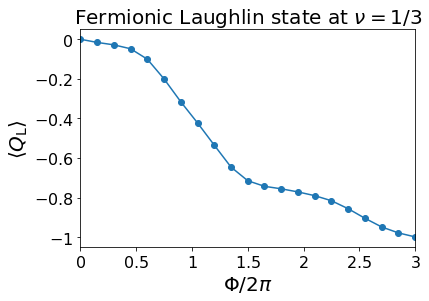

In [59]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.plot(data9['phi_ext'], data9['QL']-data9['QL'][0], marker='o')
ax.set_xlabel(r"$\Phi / 2 \pi$", fontsize=20)
ax.set_ylabel(r"$ \langle Q_\mathrm{L} \rangle $", fontsize=20)
ax.set_title(r"Fermionic Laughlin state at $\nu=1/3$", fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%g$'))
ax.set_xlim([0, 3])
plt.show()

If you have any questions about this tutorial, please e-mail Bartholomew Andrews at bartandrews123@gmail.com